# Business Context

## Introduction

Measurement of performance is vital to business success and most performance studies are related to key performance indicators (KPIs). A Key performance indicator is a metric, measuring how well the organization is performing on operational, tactical or strategic activities that is critical for the current and future success of the organization. 

In the Oil and Gas industry, KPIs can be used for monitoring and measuring operational quality performance. In *Drilling*, a process whereby a hole is bored using a drill bit to create a well for oil and natural gas production, one example of KPI would be the **Slip to Slip connection time**. This KPI can offer significant improvements in identifying sources of Non-Productive Time.

The **Slips** is a device used to grip and hold the upper part of a drill pipe to the drill floor, which is the area where the pipe begins its trip into the earth. The Slips is used when making a **connection**: the pipes are jointed in order to advance further into the hole. Therefore, each pipe is picked up by a hook, temporarily gripped by the slips and then jointed to another pipe. After the joint, the slips is removed and the entire pipe is carefully lowered into the hole, resuming the drilling. A skilled rig crew can physically accomplish all of those steps in a minute or two.

In the following video, you can have a better idea of how a drill pip connection works. Video link: https://www.youtube.com/watch?v=QrPg8sMgRWk.

Note that, in the video, the **Slips** is the device added at [1:13 ](https://youtu.be/QrPg8sMgRWk?t=73)by the operator in a white T-shirt (image below). Also, at [1:48](https://youtu.be/QrPg8sMgRWk?t=108) the two pipes are jointed together and the Slips is taken off at [4:32](https://www.youtube.com/watch?v=QrPg8sMgRWk&feature=youtu.be&t=272). 

## The Challenge

In this challenge, you should do an Exploratory Data Analysis (EDA) in order to extract useful information for the development of the KPI mentioned in the Introduction (Slip to Slip connection time).

We expect you to:

* Describe the data;
* Preprocess the data;
  * Define which strategy you used for missing values, if there are any;
  * Define which strategy you used for duplicated values, if there are any;
  * Usually sensor data has embedded some amount of noise. Analysis of such raw data may often fail to give accurate information. Define which strategy you used for dealing with noise.
  * Machine learning methods are usually based on the assumption that the data generation mechanism does not change over time. However, some series in the dataset don't present this characteristic, having its statistical properties changing over time. Define which strategy you used to deal with this problem.
* Identify the most important variables for detecting when the slips is on or off ;
* Identify relations between variables;
* Build additional features that can help the detection of when the slips is on or off ;
* Outline the conclusions you could reached with your analysis;

**Bonus Question**: If you were also asked to develop a model that would point out when the drill string is placed on the slips and when it's taken off the slips, which model would you choose? Can you explain why and the possible downsides? How would you evaluate your model? It is important to emphasize that this model must be able to handle real-time inference.

**ASSUMPTIONS**

***- I'm assuming that the company can increase of up to 20% of they gross income because this projetc will help her to be better organized.***

***- I'm assuming that the time of slips in is about 26% of the total time and the time out is all the remainder.***

## Data

The data that represents a multivariate time series collected by sensors during a **drilling** operation and it's *discretized* by 1 second. In this operation, the pipe connections happen in the same manner as explained in the Introduction section. 

In the `data/` folder, you'll find:

* `challenge_dataset.csv` - The file containing the data for the challenge, separated by comma. 
* `variables_dictionary.txt` - A text file explaining the meaning of each column in the dataset.

## Solve This Challenge

For the development of the challenge, you must:

* Implement in a [Jupyter Notebook](https://jupyter.org/install.html) in the Python programming language;
* Elaborate a presentation (slides) with your methodology and findings;
* Justify your choices.

All tasks should be done in English.

## Index

**0.0. Imports**

**0.1. Helper Functions**

**0.2. Loading Data**

**1.0. Data description**

    1.1. Rename Columns
    1.2. Data Dimensions
    1.3. Checking Data Types
    1.4. Changing Data Types
    1.5. Check NA
    1.6. Fillout NA and Replacing Zero Values
    1.7. Descriptive Statistical
    1.8. Checking Outliers
    1.9. Adjusting Distorted Values
    
**2.0. Feature Engineering**

    2.1.Mindmap
    2.2.Hypothesis List    
    2.4. Feature Engineering
    
**3.0. Filtering the features**

    3.1.Filtering Data    
    3.2.Derivating Data
    
**4.0. Exploratory Data Analysis**

    4.1.Univariate Analysis    
    4.2.Bivariate Analysis    
    4.3.Multivariate Analysis    
    4.4.Manual Feature Selection
    
**5.0. Data preparation**

    5.1. Rescaling Pre Analysis        
    5.2. Preparing Train Dataset    
        5.2.1. Rescaling        
        5.2.2. Response Variable Transformation
    
    5.3. Preparing Test Dataset    
        5.3.1. Rescaling        
        5.3.2. Response Variable Transformation
        
**6.0. Feature selection**
    
    6.1. Recursive Feature Elimination (RFE)    
    6.2. Boruta as Feature Selector    
    6.3. Manual Selection
    6.4. Cols Final

**7.0. Machine Learning Modelling**

    7.1. Linear Regression        
        7.1.1. Linear Regression Cross Validation
    
    7.2. Random Forest Regressor    
        7.2.1. Random Forest Regressor Cross Validation
        
    7.3. XGBoost Regressor    
        7.3.1. XGBoost Regressor Cross Validation
    
    7.4. Machine Learning Performance        
        7.4.1. Cross Validation Performance
    
**8.0. Hyperparameter Fine Tunning**

    8.1. Random Search
    8.2. Tuned Model
    
**9.0. Real Performance - Cross-Validation**

    9.1. Business Performance
    9.2. Machine Learning Performance Interpretation

**10. Deployment**

**11.0. Next Steps And Conclusion**

    11.1. Next Steps
    11.2. Conclusion

# 0.0. Imports

In [1]:
# stetic libraries
import warnings
from tabulate import tabulate
from IPython.core.display import HTML
from IPython.display import Image
import inflection

# data manipulation libraries
import math
import datetime
import pandas as pd

# data analysis libraries
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import gridspec

# data preparation
from sklearn.model_selection   import train_test_split,cross_val_score, RandomizedSearchCV
from sklearn.feature_selection import RFE
from boruta                    import BorutaPy
from sklearn.preprocessing     import RobustScaler
from sklearn.preprocessing     import MinMaxScaler

# machine learning modeling
from sklearn.ensemble        import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost               as xgb
from lightgbm                import LGBMRegressor

# error traduction
from sklearn.metrics import mean_absolute_error, mean_squared_error

# deployment
import pickle
import streamlit as st

# using this method to change the scientific numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# using this method to deactivate warnings
warnings.filterwarnings('ignore')

# 0.1. Helping Functions

In [2]:
#function to adjust the seaborn plots
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    sns.set()

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [4]:
#function to calculate the MAPE
def mean_percentage_error(y, yhat):
    return np.mean((y - yhat)/y)

In [5]:
#function to calculate the MAE
def mean_absolute_percentage_error(y, yhat):
    return np.mean(np.abs((y - yhat)/y))

In [6]:
#function to calculate all errors
def ml_error(model_name, y, yhat):
    mae = mean_absolute_error(y, yhat)
    mape = mean_absolute_percentage_error(y, yhat)
    rmse = np.sqrt(mean_squared_error(y, yhat))
    
    return pd.DataFrame({'Model Name': model_name,
                         'MAE': mae,
                         'MAPE': mape,
                         'RMSE': rmse}, index=[0])

# 0.2. Loading Data

 The data origin on this situation was offered by the Intelie for this challenge.

In [7]:
# load dataset
df = pd.read_csv('data/df_corrected.csv')

List of columns and explains

| Attributtes    |                                                              |
| -------------- | ------------------------------------------------------------ |
| WOBA.klbf          | Weight-on-Bit (surfice, average).                        |
| TQA.ft.lbf          | Rotary Torque (surface, average).                       |
| RPMA.rpm        | Rotary Speed (surface, average).                            |
| HKLA.klbf        | Hookload (average).                                        |
| DMEA.ft   | Depth hole (measured).                                            |
| DBTM.ft  | Depth bit (measured).                                              |
| BPOS.ft       | Block position (in ft).                                       |
| MFOP.%  | Mud flow out (percentual ).                                         |
| MFIA.galUS/min | Mud flow in average (in galUS/min).                          |
| MDOA.ppg        | Mud density out (average).                                  |
| MDIA.ppg  | Mud density in (average).                                         |
| ROPA.ft/h   | Rate of penetration (average).                                  |
| DHWOB.klbf  | Downhole weight on bit.                                         |
| DHTQ.ft.lbf       | Downhole torque.                                          |
| ECD.ppg  | Equivalent circulating density.                                    |
| SPPA.psi | Standpipe pressure (average).                                      |
| TIME.S         | Timestamp (in seconds).                                      |

In [8]:
# initial data check
df.head()

,WOBA.klbf,TQA.ft.lbf,RPMA.rpm,HKLA.klbf,DMEA.ft,DBTM.ft,BPOS.ft,MFOP.%,MFIA.galUS/min,MDOA.ppg,MDIA.ppg,ROPA.ft/h,DHWOB.klbf,DHTQ.ft.lbf,ECD.ppg,SPPA.psi,TIME.S
0,0,NaN,0.00,93905.00,22207.80,4675.50,60.90,13.00,0,NaN,NaN,NaN,NaN,NaN,NaN,12.89,1533230780
1,0,NaN,0.00,94492.00,22207.80,4675.50,60.90,14.00,0,NaN,NaN,NaN,NaN,NaN,NaN,13034.00,1533230800
2,0,NaN,0.00,94011.00,22207.80,4675.50,60.90,12.11,0,NaN,NaN,NaN,NaN,NaN,NaN,12265.00,1533230820
3,0,NaN,0.00,93.91,22207.80,4675.50,60.90,13.00,0,NaN,NaN,NaN,NaN,NaN,NaN,14602.00,1533230840
4,0,NaN,0.00,94.00,22207.80,4675.50,60.90,12004.00,0,NaN,NaN,NaN,NaN,NaN,NaN,14703.00,1533230860


# 1.0. Step 01 - Data Descriptions

In [9]:
# copying the dataset to evade modifications problems
df1 = df.copy()

## 1.1. Rename Columns

In [10]:
# checking columns name
df1.columns

Index(['WOBA.klbf', 'TQA.ft.lbf', 'RPMA.rpm', 'HKLA.klbf', 'DMEA.ft',
       'DBTM.ft', 'BPOS.ft', 'MFOP.%', 'MFIA.galUS/min', 'MDOA.ppg',
       'MDIA.ppg', 'ROPA.ft/h', 'DHWOB.klbf', 'DHTQ.ft.lbf', 'ECD.ppg',
       'SPPA.psi', 'TIME.S'],
      dtype='object')

Passing columns to snakecase

In [11]:
# selecting old columns
cols_old = ['WOBA.klbf', 'TQA.ft.lbf', 'RPMA.rpm', 'HKLA.klbf', 'DMEA.ft',
       'DBTM.ft', 'BPOS.ft', 'MFOP.%', 'MFIA.galUS/min', 'MDOA.ppg',
       'MDIA.ppg', 'ROPA.ft/h', 'DHWOB.klbf', 'DHTQ.ft.lbf', 'ECD.ppg',
       'SPPA.psi', 'TIME.S']

# creating snakecase variable
snakecase = lambda x: inflection.underscore( x )

#creating snakecase columns
cols_new = list(map(snakecase, cols_old))

# renaming columns
df1.columns = cols_new

# checking columns
df1.columns

Index(['woba.klbf', 'tqa.ft.lbf', 'rpma.rpm', 'hkla.klbf', 'dmea.ft',
       'dbtm.ft', 'bpos.ft', 'mfop.%', 'mfia.gal_us/min', 'mdoa.ppg',
       'mdia.ppg', 'ropa.ft/h', 'dhwob.klbf', 'dhtq.ft.lbf', 'ecd.ppg',
       'sppa.psi', 'time.s'],
      dtype='object')

## 1.2. Data Dimensions

Checking data dimensions

In [12]:
print(f'Number of Rows: {df1.shape[0]}')
print(f'Number of Cols: {df1.shape[1]}')

Number of Rows: 14827
Number of Cols: 17


## 1.3. Checking Data Types

Checking data types

In [13]:
df1.dtypes

woba.klbf            int64
tqa.ft.lbf         float64
rpma.rpm           float64
hkla.klbf          float64
dmea.ft            float64
dbtm.ft            float64
bpos.ft            float64
mfop.%             float64
mfia.gal_us/min      int64
mdoa.ppg           float64
mdia.ppg           float64
ropa.ft/h          float64
dhwob.klbf         float64
dhtq.ft.lbf        float64
ecd.ppg            float64
sppa.psi           float64
time.s               int64
dtype: object

## 1.4. Changing Data Types

Replacing methods don't work, then I converted from the source the ',' to '.' and converted here in float64.

In [14]:
df1['rpma.rpm'] = df1['rpma.rpm'].astype(float64)
df1['hkla.klbf'] = df1['hkla.klbf'].astype(float64)
df1['dmea.ft'] = df1['dmea.ft'].astype(float64)
df1['dbtm.ft'] = df1['dbtm.ft'].astype(float64)
df1['bpos.ft'] = df1['bpos.ft'].astype(float64)
df1['mfop.%'] = df1['mfop.%'].astype(float64)

## 1.5. Check NA

In [15]:
df1.isna().sum()

woba.klbf              0
tqa.ft.lbf         14827
rpma.rpm               0
hkla.klbf              0
dmea.ft                0
dbtm.ft                0
bpos.ft                0
mfop.%                 0
mfia.gal_us/min        0
mdoa.ppg           14827
mdia.ppg           14827
ropa.ft/h          14827
dhwob.klbf         14827
dhtq.ft.lbf        14827
ecd.ppg            14827
sppa.psi               0
time.s                 0
dtype: int64

## 1.6. Fillout NA and Replacing Zero Values

To fillout and replace this values, I used mathematical formulas from the internet and my knowledge to solve this problems, but if it's in a real situation, I would go to the client to obtain business knowledge and do this things.

In [16]:
# filling the weight column with the method "pressure/(volume*0.052)
df1_var1 = df1['dbtm.ft']*0.052
df1['woba.klbf'] = df1['sppa.psi']/df1_var1

In [17]:
# filling downhole weight on bit with weight-on-bit*downhole weight on bit
df1['dhwob.klbf'] = df1['woba.klbf']*df1['dbtm.ft']

In [18]:
# filling rate of penetration by "depth hole/depth in"
df1['ropa.ft/h'] = df1['dbtm.ft']/df1['dmea.ft']

In [19]:
# excluding ECD because don't have the mass of the mud.
df1 = df1.drop('ecd.ppg', axis=1)

In [20]:
# excluding torque column because I don't have the downhole torque (force in torque).
df1 = df1.drop('tqa.ft.lbf', axis=1)

In [21]:
# excluding mud density in and out because don't have the mass of the mud.
df1 = df1.drop('mdia.ppg', axis=1)

In [22]:
# excluding mud density out and out because don't have the mass of the mud.
df1 = df1.drop('mdoa.ppg', axis=1)

In [23]:
# excluding downhole torque because I wasn't able to how calculate with the data that I have.
df1 = df1.drop('dhtq.ft.lbf', axis=1)

In [24]:
# excluding mud flow average because I don't know the mud flow in values.
df1 = df1.drop('mfia.gal_us/min', axis=1)

## 1.7. Descriptive Statistical

In [25]:
num_attributes = df1.copy()

In [26]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, knew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenate

m = pd.concat([ct1, ct2, d1, d2, d3, d4, d5, d6]).T.reset_index()
m.columns = ['attributes', 'mean', 'median', 'std', 'min', 'max', 'range', 'skew', 'kurtosis']
m

,attributes,mean,median,std,min,max,range,skew,kurtosis
0,woba.klbf,9.48,0.00,19.27,0.00,86.55,86.55,1.77,1.71
1,rpma.rpm,4.09,0.00,54.67,0.00,2227.00,2227.00,19.36,496.69
2,hkla.klbf,88531.92,96426.00,83550.67,78.16,350315.00,350236.84,0.91,0.39
3,dmea.ft,22206.94,22207.80,104.88,9436.38,22207.80,12771.42,-121.77,14827.00
4,dbtm.ft,891244.66,9776.10,3451786.39,1986.68,19665705.00,19663718.32,4.05,15.65
5,bpos.ft,6348.58,39.30,15983.86,6.60,84875.00,84868.40,2.50,4.95
6,mfop.%,5881.79,18.00,9027.77,0.00,24619.00,24619.00,0.90,-1.15
7,ropa.ft/h,40.13,0.44,155.43,0.21,885.53,885.32,4.05,15.65
8,dhwob.klbf,61087.59,0.00,115473.04,0.00,437230.77,437230.77,1.41,0.11
9,sppa.psi,3176.55,0.00,6004.60,0.00,22736.00,22736.00,1.41,0.11


## 1.8. Checking Outliers

In this part was made a analysis of the features to know more about the datas in the descriptive statistical analysis.

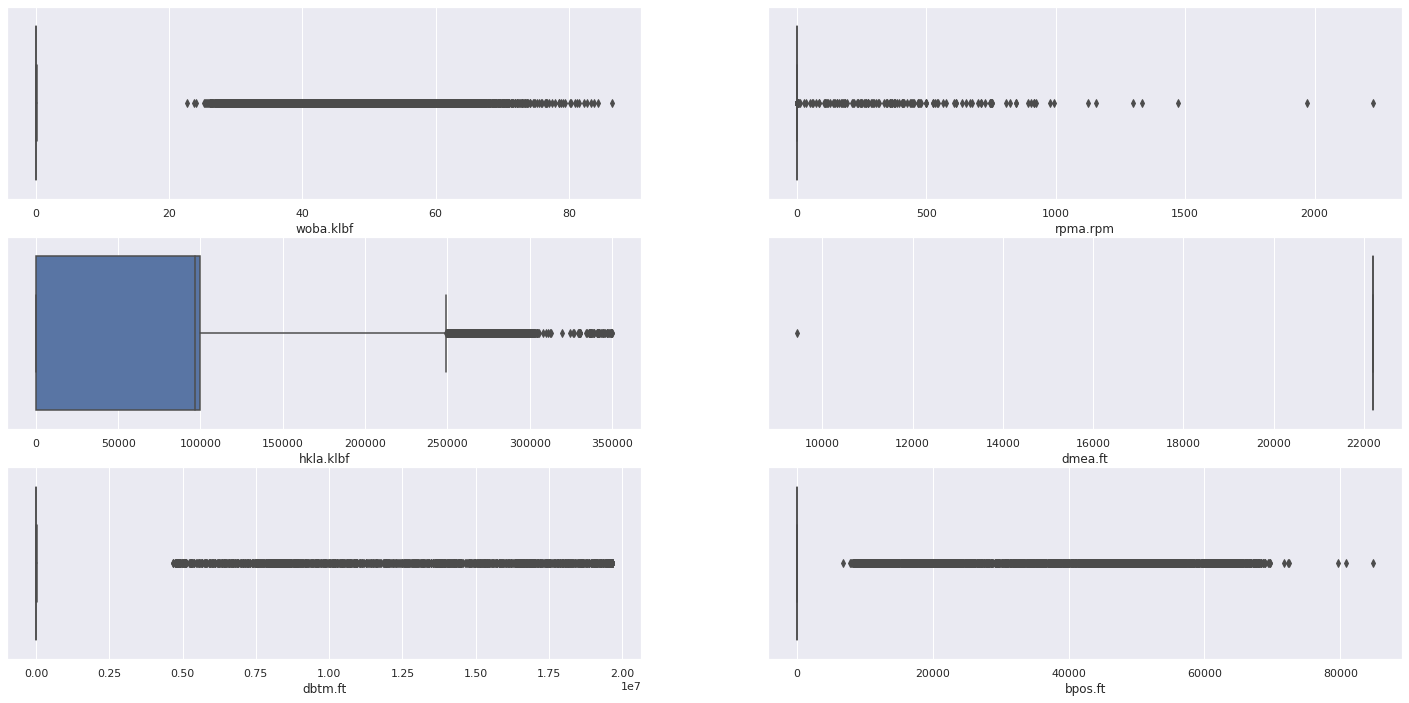

In [27]:
#first set of features

#woba.klbf
plt.subplot(3,2,1)
sns.boxplot(df1['woba.klbf']);

#rpma.rpm
plt.subplot(3,2,2)
sns.boxplot(df1['rpma.rpm']);

#hkla.klbf
plt.subplot(3,2,3)
sns.boxplot(df1['hkla.klbf']);

#dmea.ft
plt.subplot(3,2,4)
sns.boxplot(df1['dmea.ft']);

#dbtm.ft
plt.subplot(3,2,5)
sns.boxplot(df1['dbtm.ft']);

#bpos.ft
plt.subplot(3,2,6)
sns.boxplot(df1['bpos.ft']);

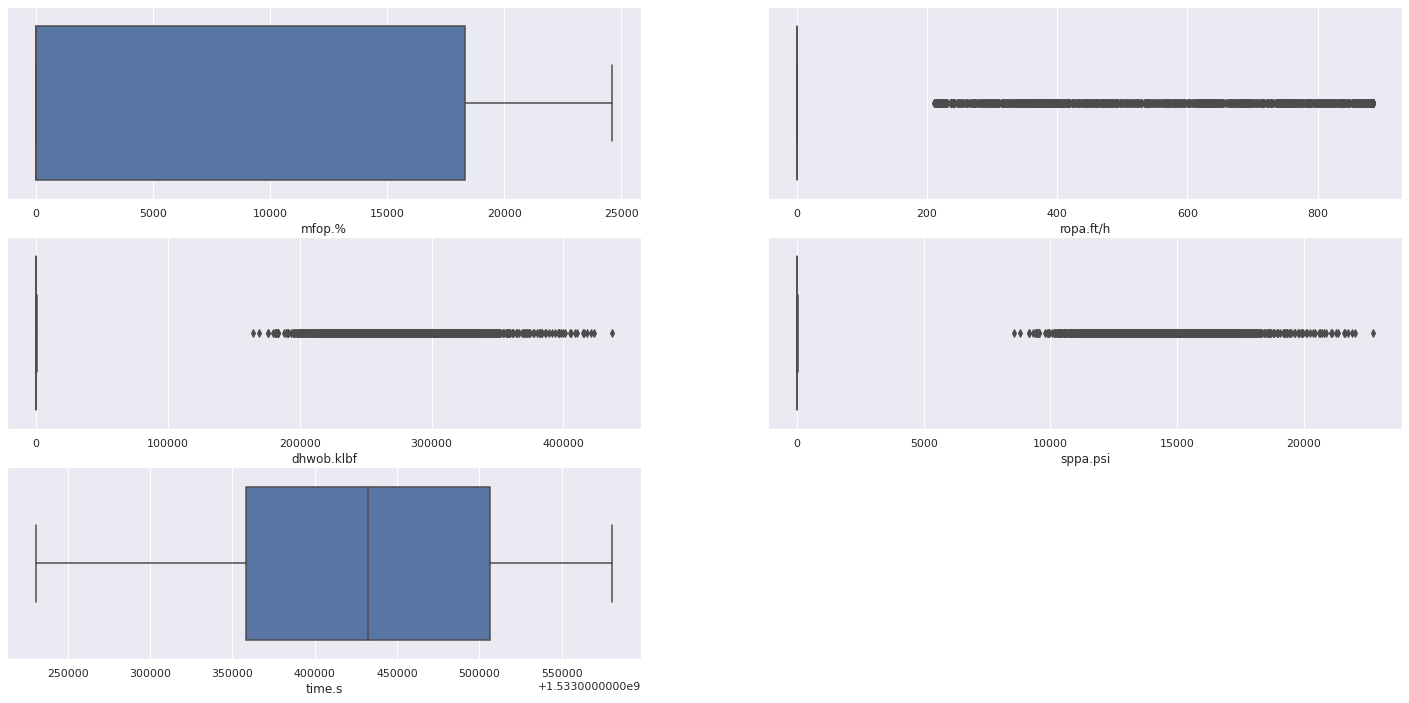

In [28]:
#second set of features

#mfop.%
plt.subplot(3,2,1)
sns.boxplot(df1['mfop.%']);

#ropa.ft/h
plt.subplot(3,2,2)
sns.boxplot(df1['ropa.ft/h']);

#dhwob.klbf
plt.subplot(3,2,3)
sns.boxplot(df1['dhwob.klbf']);

#sppa.psi
plt.subplot(3,2,4)
sns.boxplot(df1['sppa.psi']);

#time.s
plt.subplot(3,2,5)
sns.boxplot(df1['time.s']);

## 1.9. Adjusting Distorted Values

Here was made some adjustments to become the dataset more razoable.

In [29]:
# dividing the values by 1000 to the values be lower than the depth holes values.
for i in range(len(df1)):
    if df1.loc[i, 'dbtm.ft'] > df1.loc[i, 'dmea.ft']:
        df1.loc[i, 'dbtm.ft'] = df1.loc[i, 'dbtm.ft']/1000

# dividing mud flow out with values greater than 100 by 1000 to become a percentual value correct
for i in range(len(df1)):
    if df1.loc[i, 'mfop.%'] > 100:
        df1.loc[i, 'mfop.%'] = df1.loc[i, 'mfop.%']/1000

# filtering seven high distorted values from the dataset
df1 = df1[df1['rpma.rpm'] <= 1000]

# 2.0. Step 02 - Feature Engineering

In [30]:
df2 = df1.copy()

## 2.1. Mindmap

Mindmap created in coggle and derivated from my personal knowledge about the assunt. 

In [31]:
Image('mindmap.png')

FileNotFoundError: No such file or directory: 'mindmap.png'

FileNotFoundError: No such file or directory: 'mindmap.png'

<IPython.core.display.Image object>

## 2.2. Hypothesis List

**Hypothesis list derivated from the mindmap and considering the existent features and possibly engineering features.**

**H1.** Bits with low or medium weight needs less time to be finished.

**H2.** Extractions with higher rotary speed needs less time to be finished.

**H3.** The smaller the difference between the depth bit and depth hole less time will be take to finish.

**H4.** Extractions with a lower or medium depth bit needs less time to be finished.

**H5.** Extractions with a block position closer of the surface is more faster.

**H6.** Extractions with higher mud flow needs less time to be finished.

**H7.** Standpipes with less pressure makes the extraction be more faster.

**H8.** The highest density of weight of bit makes the extraction be more faster.

## 2.3. Feature Engineering

With base on the video showed to exemplify the activity, I decided to supress the 'time.s' variable to create the 'time_out' variable, because I am assuming that the minimum time to did the excavation is about 4 minutes.

Then I am supressing the minimum value to exactly four minutes and reducing all the others in set to don't lose the variety and keep some logic.

To find the 'slips in moment' variable I decided to dedicate 26% of the general time predicted to this parts, because with base on the video the 'slips in moment' occupied about this percentual of time and all the time after the slips in is the time at the slips out.

In [32]:
#showing the minimum value.
df2['time.s'].min()

1533230780

With this showed I am reducing in exactly "1533230540" all the values to create the 'time_out' column and this column will be my responsable variable.

In [33]:
# difference between depth hole and depth bit
df2['dif_hol_bit'] = df2['dmea.ft'] - df2['dbtm.ft']

# derivating density of weight on bit (Weight-on-Bit by the gravity of Earth)
df2['weig_bit_dens'] = (df2['woba.klbf']/9.807)*df2['dbtm.ft']

# creating time_out variable
df2['time_out'] = df2['time.s'] - 1533230540

# 3.0. Step 03 - Derivating and Filtering Data

In [34]:
df3 = df2.copy()

## 3.1. Filtering Data

In [35]:
df3.head(3)

,woba.klbf,rpma.rpm,hkla.klbf,dmea.ft,dbtm.ft,bpos.ft,mfop.%,ropa.ft/h,dhwob.klbf,sppa.psi,time.s,dif_hol_bit,weig_bit_dens,time_out
0,0.05,0.00,93905.00,22207.80,4675.50,60.90,13.00,0.21,247.94,12.89,1533230780,17532.30,25.28,240
1,53.61,0.00,94492.00,22207.80,4675.50,60.90,14.00,0.21,250653.85,13034.00,1533230800,17532.30,25558.67,260
2,50.45,0.00,94011.00,22207.80,4675.50,60.90,12.11,0.21,235865.38,12265.00,1533230820,17532.30,24050.72,280


In [36]:
# dropping depth hole because it don't have variability and time.s because has the time_out variable
df3 = df3.drop(['dmea.ft', 'time.s'], axis=1)

## 3.2. Derivating Data

In [71]:
#target variable and features split 
X = df3.drop(columns = 'time_out',axis = 1)
y = df3['time_out']

#train test split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# 4.0. Step 04 - Exploratory Data Analysis

In [38]:
df4 = df3.copy()

## 4.1. Univariable Analysis

### 4.1.1. Response Feature

<AxesSubplot:xlabel='time_out', ylabel='Density'>

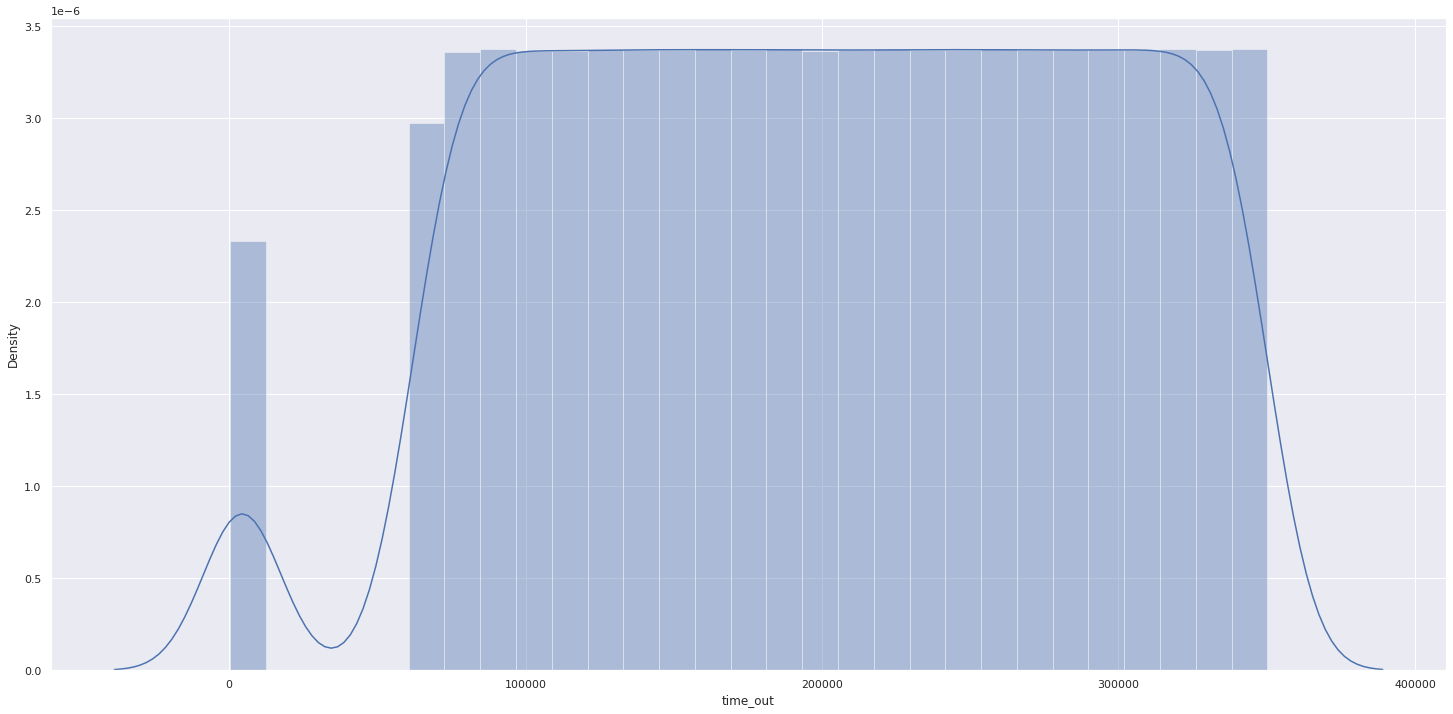

In [39]:
# checking if the responsable variable is closer than a normal variable.
sns.distplot(df4['time_out'])

### 4.1.2. All Features

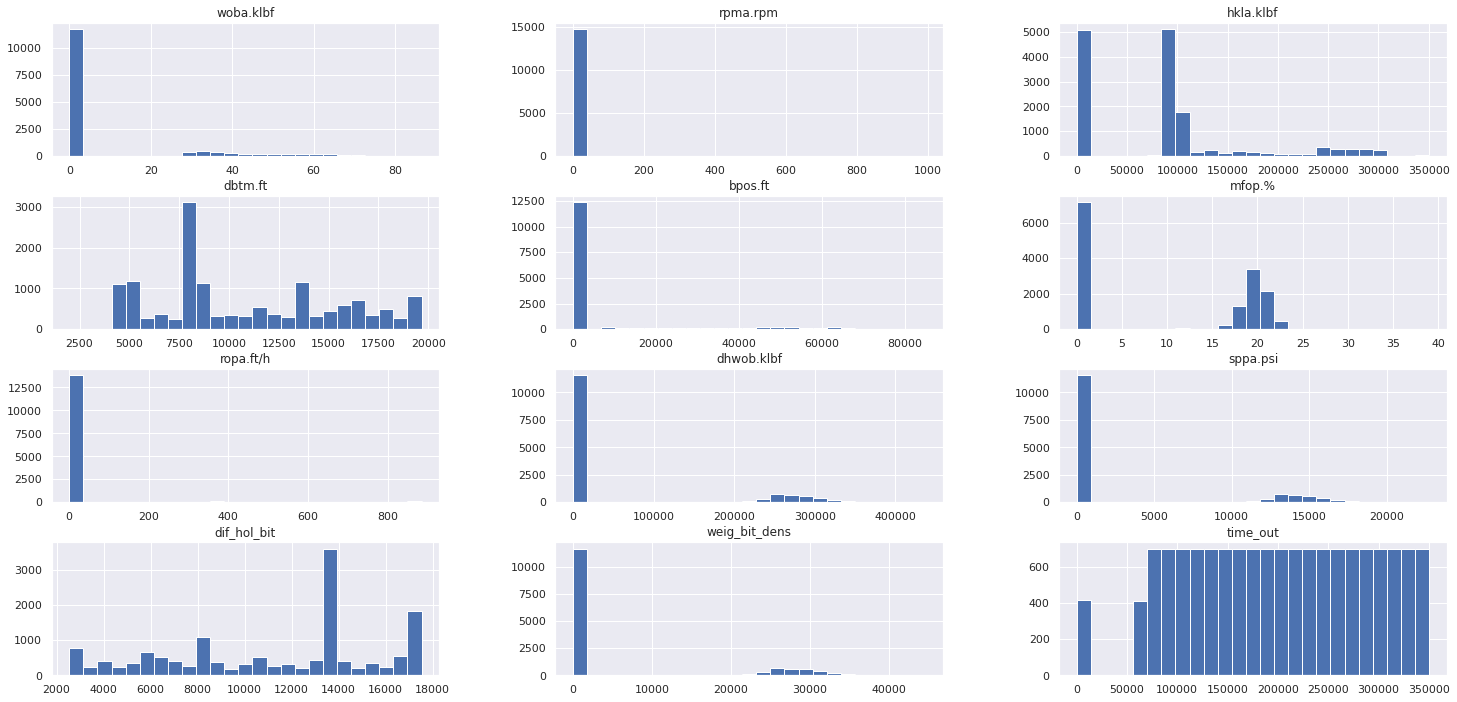

In [40]:
# checking the distribution in all features
df4.hist(bins=25);

## 4.2. Bivariable Analysis

### **H1.** Bits with low or medium weight needs less time to be finished.
**Truth** Bits with low weight needs less time in median to finish the extraction. 

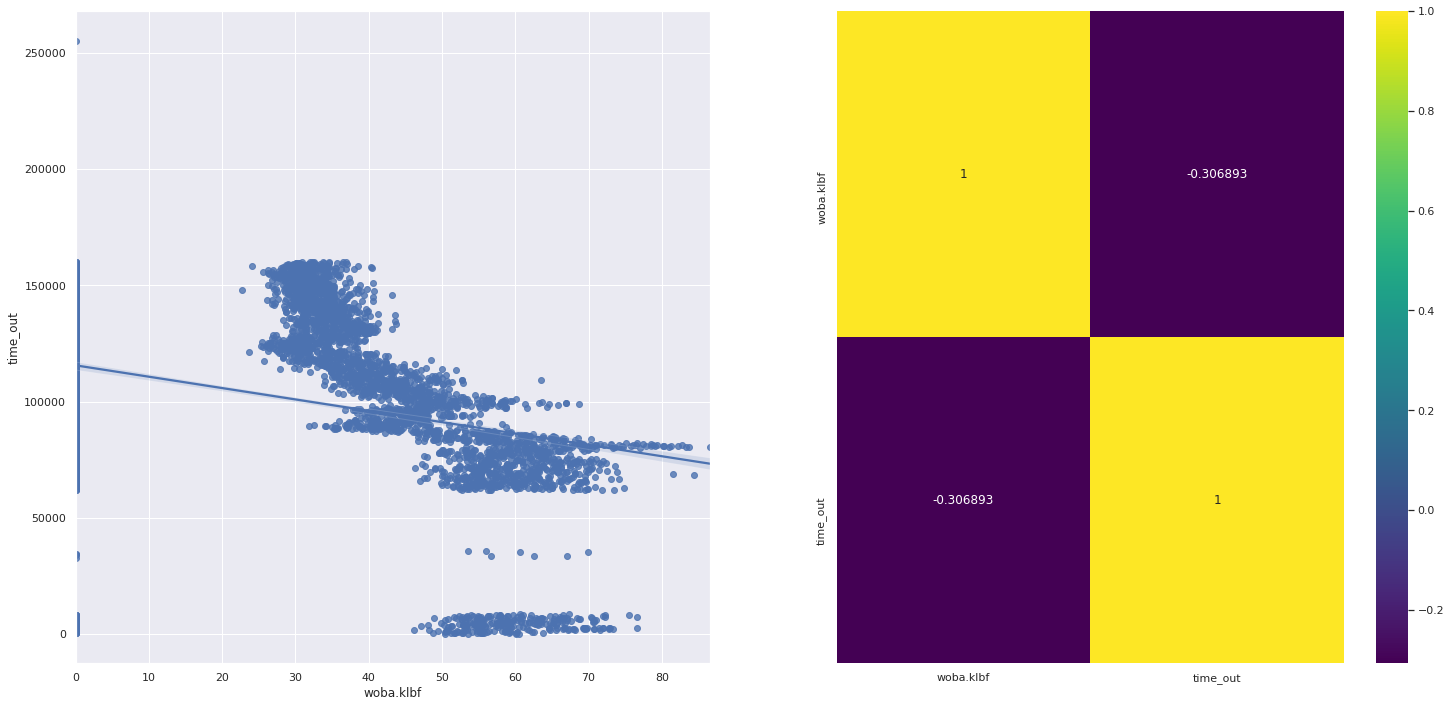

In [41]:
aux1 = df4[['woba.klbf', 'time_out']].groupby('woba.klbf').median().reset_index()
plt.subplot(1, 2, 1)
sns.regplot(x='woba.klbf', y='time_out', data=aux1);

aux2 = df4[['woba.klbf', 'time_out']].groupby('woba.klbf').median().reset_index()
plt.subplot(1, 2, 2)
sns.heatmap(aux2.corr(method='pearson'), annot=True, fmt="g", cmap='viridis');

### **H2.** Extractions with higher rotary speed needs less time to be finished. (INSIGHT)
**TRUE** Extractions with a high rotary speed is more faster in median.

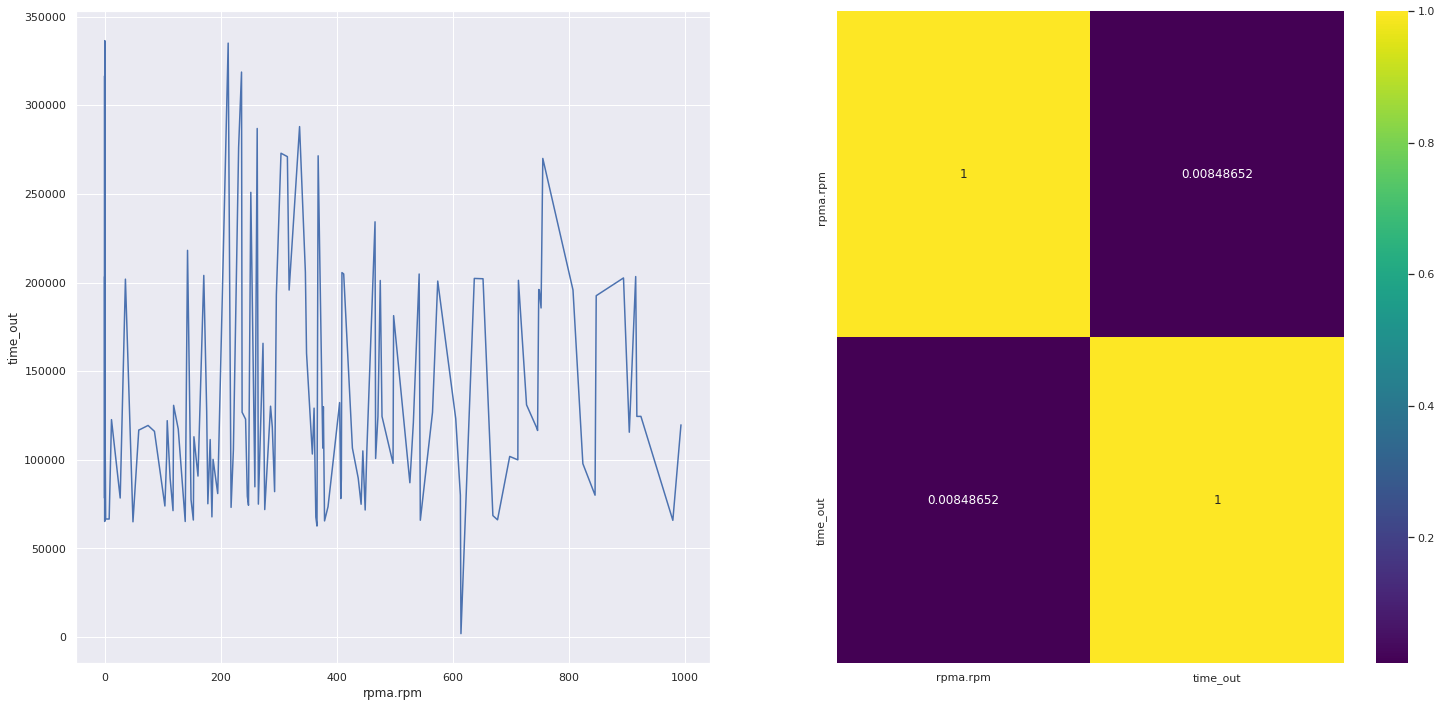

In [42]:
aux1 = df4[['rpma.rpm', 'time_out']].groupby('rpma.rpm').median().reset_index()
plt.subplot(1, 2, 1)
sns.lineplot(x='rpma.rpm', y='time_out', data=aux1);

aux2 = df4[['rpma.rpm', 'time_out']].groupby('rpma.rpm').median().reset_index()
plt.subplot(1, 2, 2)
sns.heatmap(aux2.corr(method='pearson'), annot=True, fmt="g", cmap='viridis');

### **H3.** How lower the difference between the depth bit and depth hole less time will be take to finish. (INSIGHT)
**FALSE** A higher difference between depth bit and depth hole in median do the extraction takes less time. 

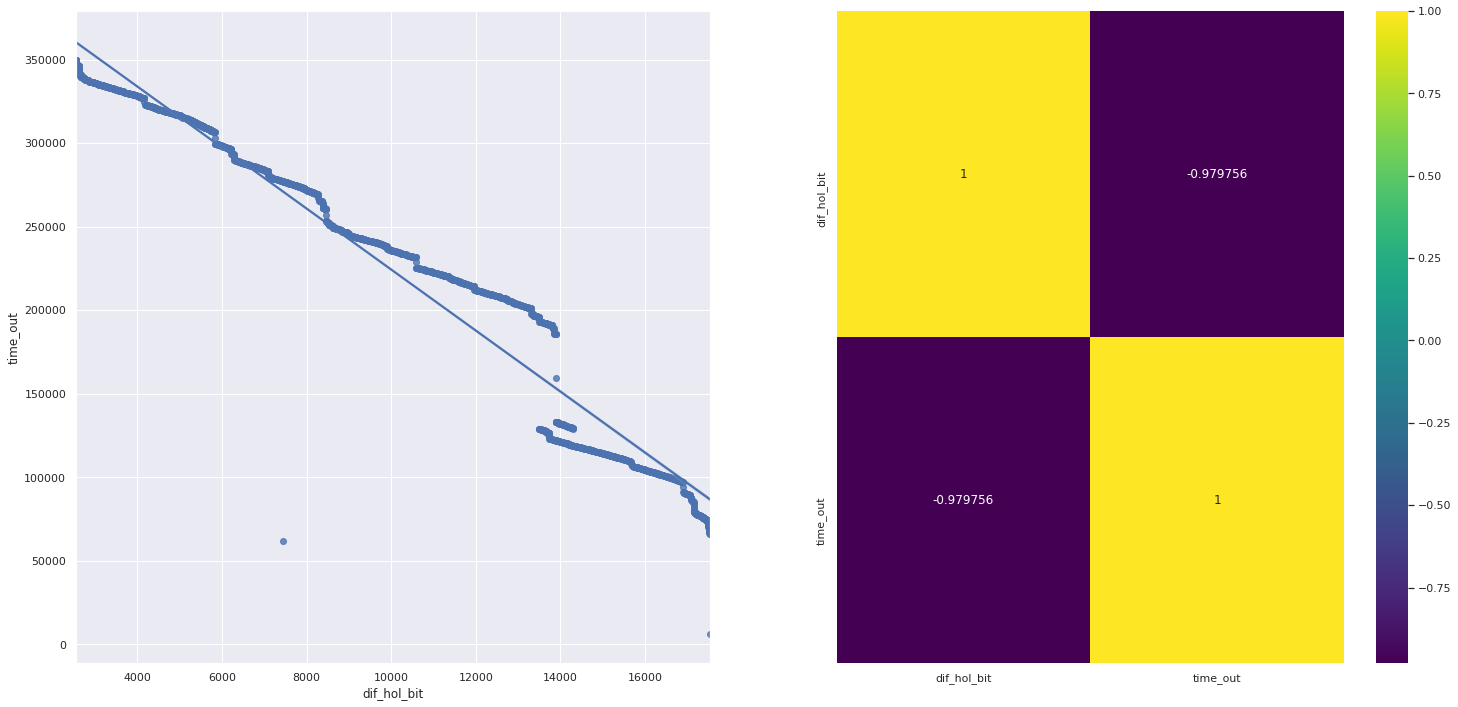

In [43]:
aux1 = df4[['dif_hol_bit', 'time_out']].groupby('dif_hol_bit').median().reset_index()
plt.subplot(1, 2, 1)
sns.regplot(x='dif_hol_bit', y='time_out', data=aux1);

aux2 = df4[['dif_hol_bit', 'time_out']].groupby('dif_hol_bit').median().reset_index()
plt.subplot(1, 2, 2)
sns.heatmap(aux2.corr(method='pearson'), annot=True, fmt="g", cmap='viridis');

### **H4.** Extractions with a bigger depth bit takes less time to be finished. (INSIGHT)
**FALSE** Extractions with a lower depth bit needs in median less time to be finished.

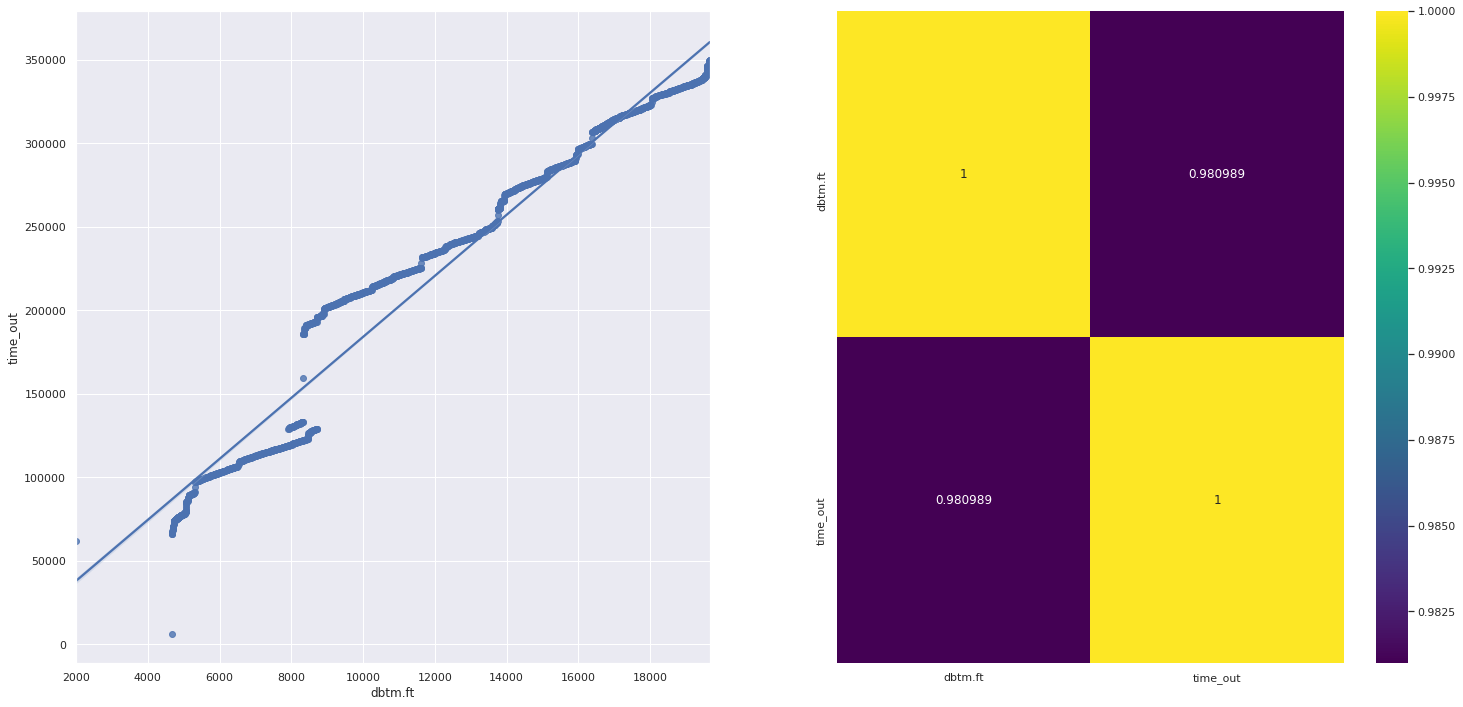

In [44]:
aux1 = df4[['dbtm.ft', 'time_out']].groupby('dbtm.ft').median().reset_index()
plt.subplot(1, 2, 1)
sns.regplot(x='dbtm.ft', y='time_out', data=aux1);

aux2 = df4[['dbtm.ft', 'time_out']].groupby('dbtm.ft').median().reset_index()
plt.subplot(1, 2, 2)
sns.heatmap(aux2.corr(method='pearson'), annot=True, fmt="g", cmap='viridis');

### **H5.** Extractions with a block position closer of the surface is more faster.
**TRUE** Block positions closer of the surface is more faster in median to extract but just a little more.

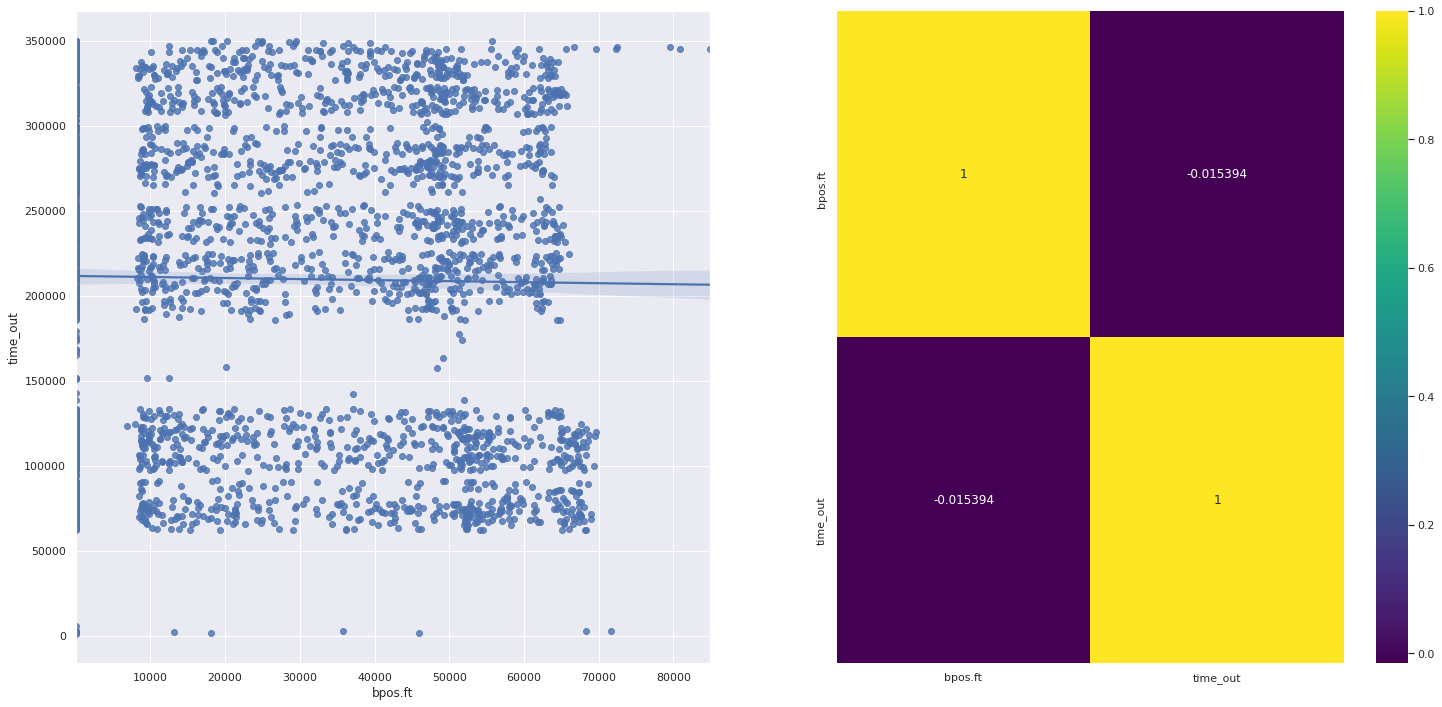

In [45]:
aux1 = df4[['bpos.ft', 'time_out']].groupby('bpos.ft').median().reset_index()
plt.subplot(1, 2, 1)
sns.regplot(x='bpos.ft', y='time_out', data=aux1);

aux2 = df4[['bpos.ft', 'time_out']].groupby('bpos.ft').median().reset_index()
plt.subplot(1, 2, 2)
sns.heatmap(aux2.corr(method='pearson'), annot=True, fmt="g", cmap='viridis');

### **H6.** Extractions with higher mud flow needs less time to be finished. (INSIGHT)
**FALSE** Extractions with lower mud flow needs in median less time to be finished.

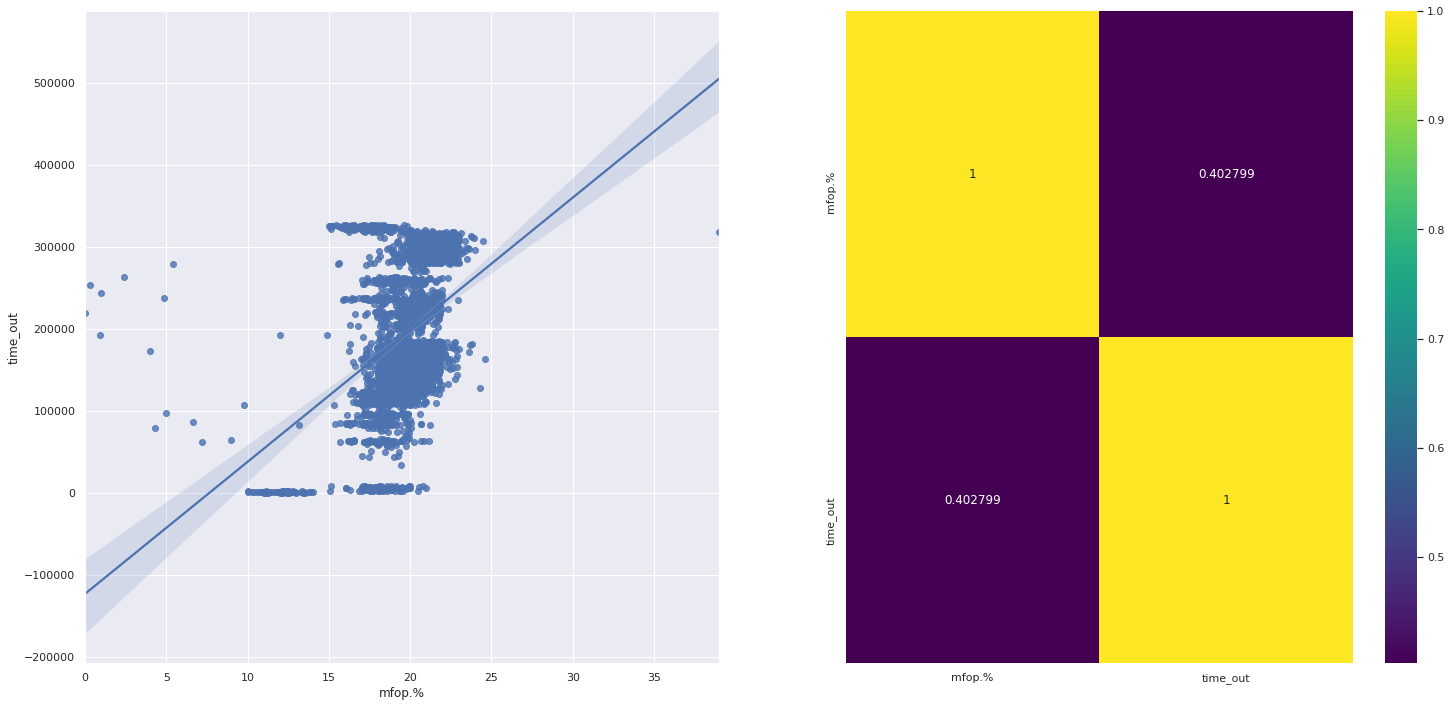

In [46]:
aux1 = df4[['mfop.%', 'time_out']].groupby('mfop.%').median().reset_index()
plt.subplot(1, 2, 1)
sns.regplot(x='mfop.%', y='time_out', data=aux1);

aux2 = df4[['mfop.%', 'time_out']].groupby('mfop.%').median().reset_index()
plt.subplot(1, 2, 2)
sns.heatmap(aux2.corr(method='pearson'), annot=True, fmt="g", cmap='viridis');

### **H7.** Standpipes with less pressure makes the extraction be more faster.
**TRUE** Standpipes with less pressure makes in median the extraction be more faster, with low and high don't change.

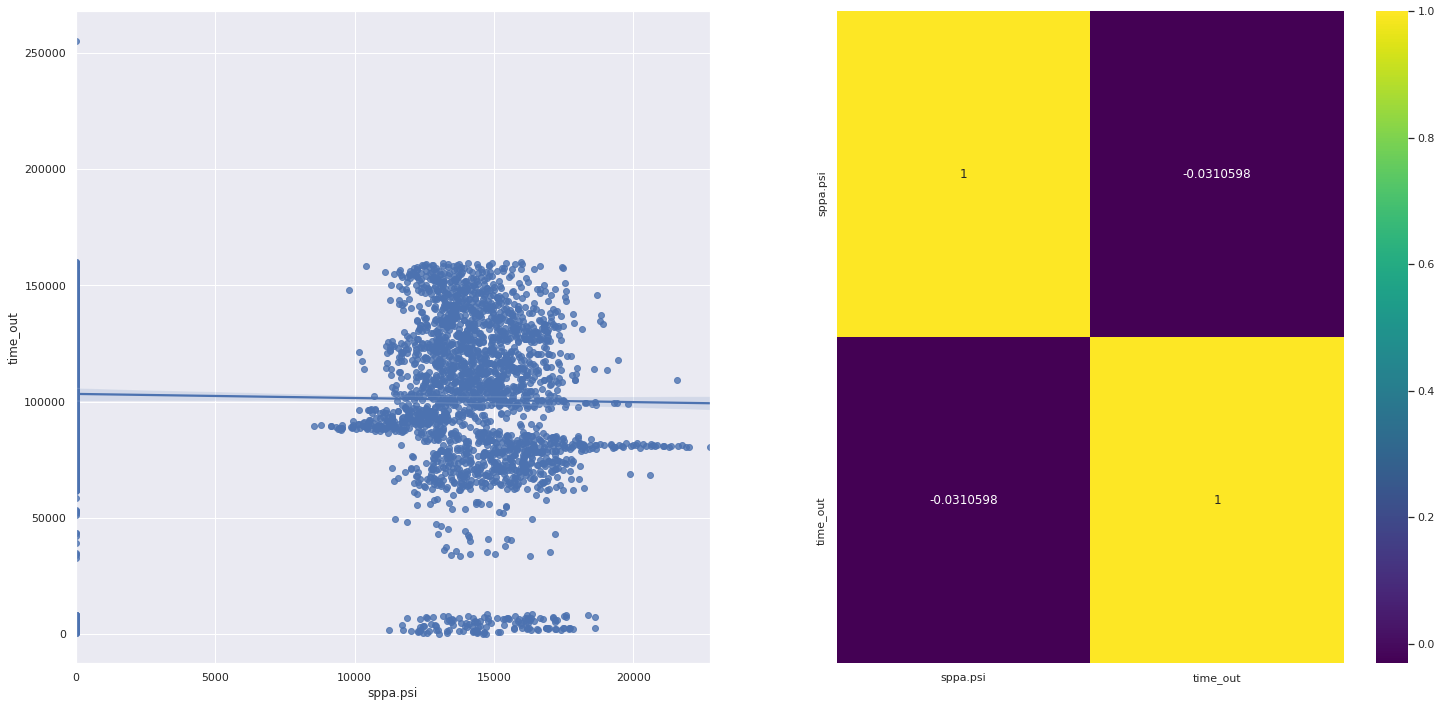

In [47]:
aux1 = df4[['sppa.psi', 'time_out']].groupby('sppa.psi').median().reset_index()
plt.subplot(1, 2, 1)
sns.regplot(x='sppa.psi', y='time_out', data=aux1);

aux2 = df4[['sppa.psi', 'time_out']].groupby('sppa.psi').median().reset_index()
plt.subplot(1, 2, 2)
sns.heatmap(aux2.corr(method='pearson'), annot=True, fmt="g", cmap='viridis');

### **H8.** The highest density of weight of bit makes the extraction be more faster.
**FALSE** How bigger the density is more time will be take in median to finish.

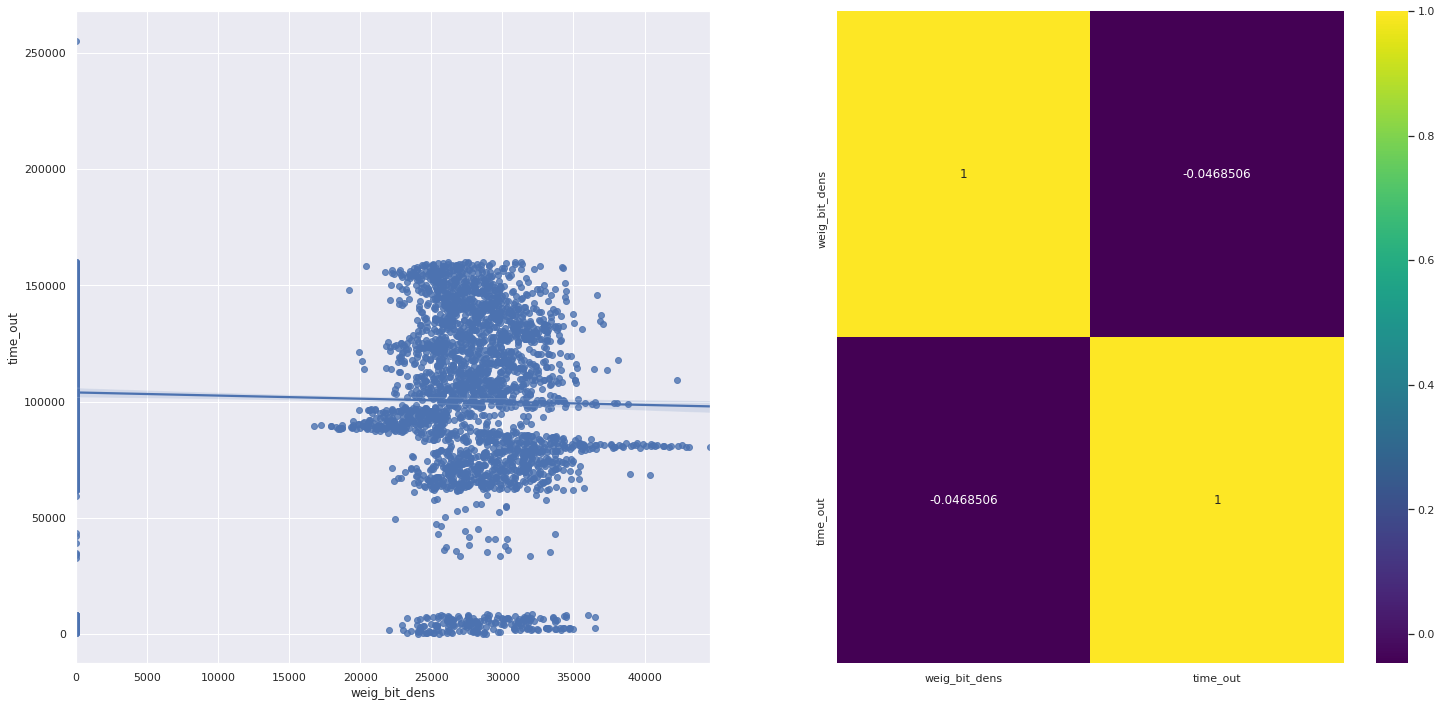

In [48]:
aux1 = df4[['weig_bit_dens', 'time_out']].groupby('weig_bit_dens').median().reset_index()
plt.subplot(1, 2, 1)
sns.regplot(x='weig_bit_dens', y='time_out', data=aux1);

aux2 = df4[['weig_bit_dens', 'time_out']].groupby('weig_bit_dens').median().reset_index()
plt.subplot(1, 2, 2)
sns.heatmap(aux2.corr(method='pearson'), annot=True, fmt="g", cmap='viridis');

### 4.2.1. Hyphotesis Sumary

To definy if a hyphotesy has relevance or no, was defined to compare with others hyphotesis validated.

In [49]:
tab = [['Hypothesis', 'Conclusion', 'Relevance'],
       ['H1', 'True', 'Medium'],
       ['H2', 'False', 'Low'],
       ['H3', 'True', 'High'],
       ['H4', 'True', 'High'],
       ['H5', 'False', 'Low'],
       ['H6', 'False', 'Medium'],
       ['H7', 'True', 'Low'],
       ['H8', 'True', 'Low']]

print(tabulate(tab, headers='firstrow'))

Hypothesis    Conclusion    Relevance
------------  ------------  -----------
H1            True          Medium
H2            False         Low
H3            True          High
H4            True          High
H5            False         Low
H6            False         Medium
H7            True          Low
H8            True          Low


## 4.3. Multivariable Analysis

To analysis the variables I plotted the heatmap of all variables showing all the correlations.

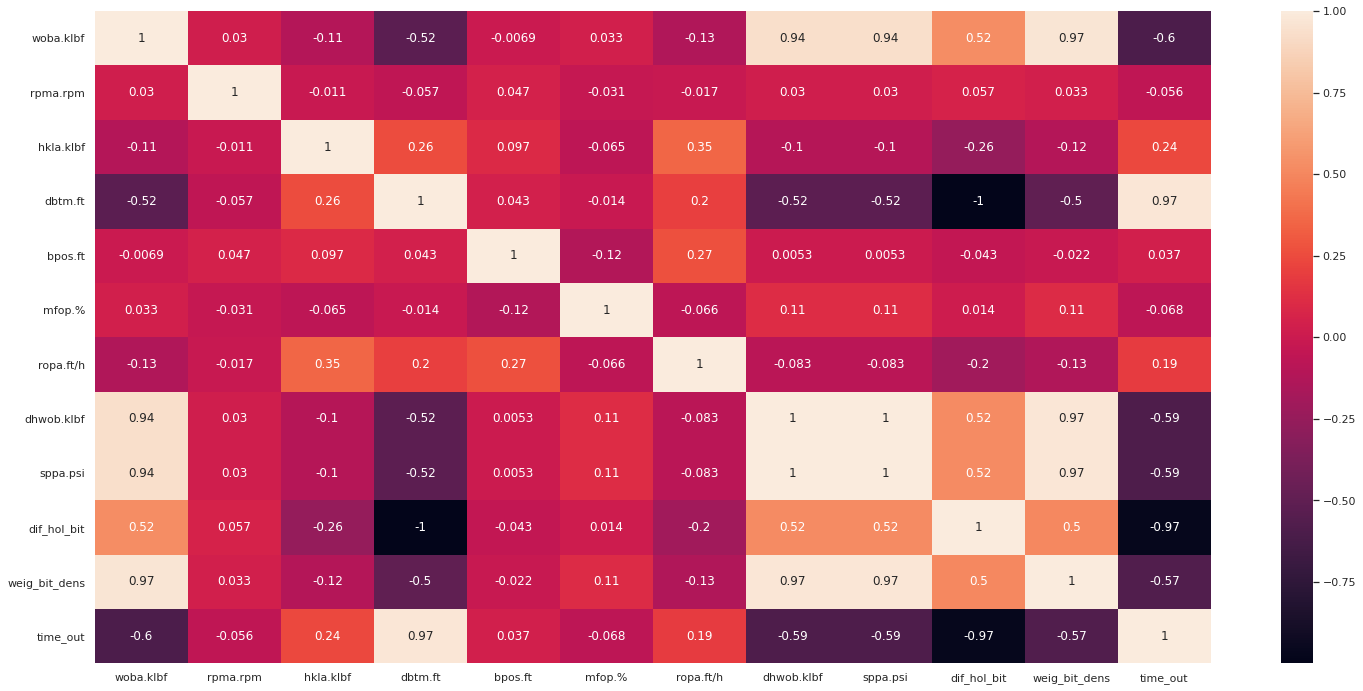

In [50]:
correlation = df4.corr(method='pearson')
sns.heatmap(correlation, annot=True);

## 4.4. Manual Feature Selection

I will add this features if the feature selection algorithm don't select them.

In [51]:
manual = ['woba.klbf', 'dif_hol_bit', 'hkla.klbf', 'dbtm.ft', 'mfop.%', 'ropa.ft/h',
         'sppa.psi']

# 5.0. Step 05 - Data Preparation

In [52]:
df5 = df4.copy()

## 5.1. Rescaling Pre Analysis

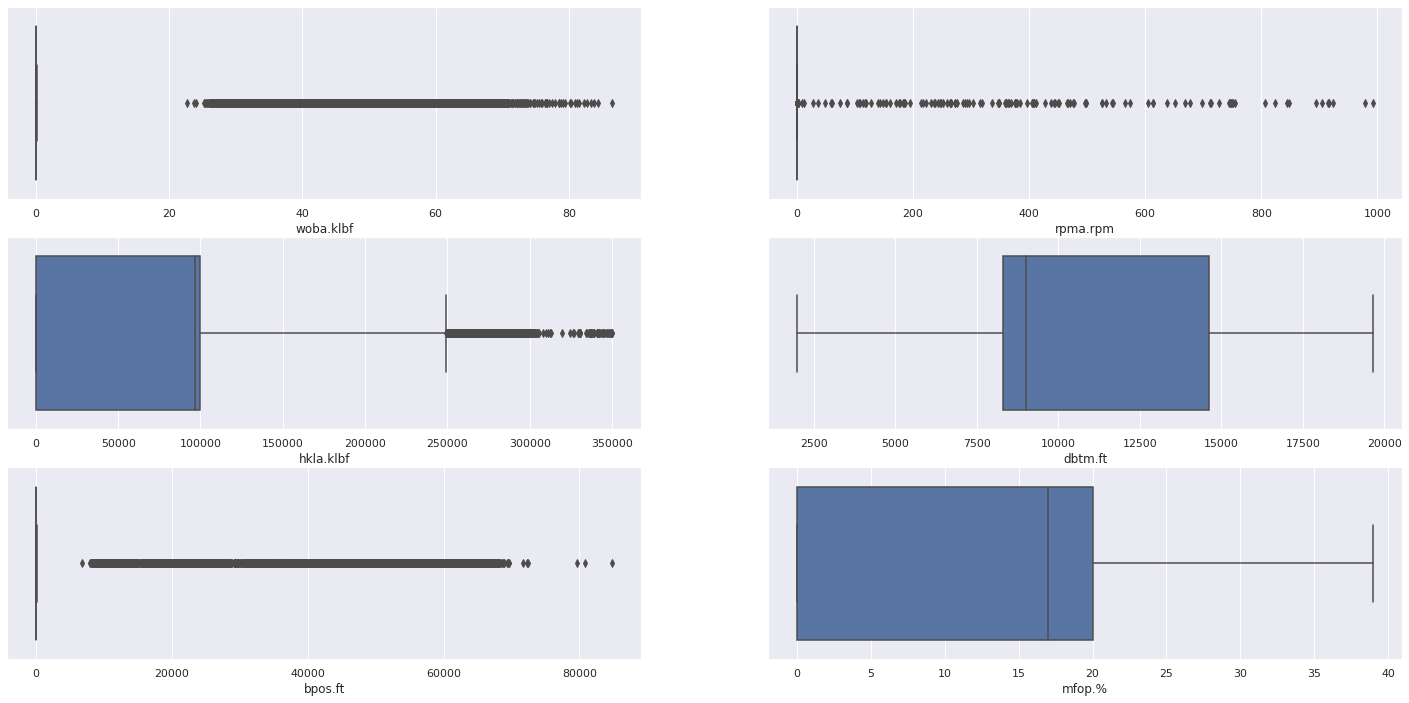

In [53]:
#first set of features

#woba.klbf
plt.subplot(3,2,1)
sns.boxplot(df5['woba.klbf']);

#rpma.rpm
plt.subplot(3,2,2)
sns.boxplot(df5['rpma.rpm']);

#hkla.klbf
plt.subplot(3,2,3)
sns.boxplot(df5['hkla.klbf']);

#dmea.ft
plt.subplot(3,2,4)
sns.boxplot(df5['dbtm.ft']);

#dbtm.ft
plt.subplot(3,2,5)
sns.boxplot(df5['bpos.ft']);

#bpos.ft
plt.subplot(3,2,6)
sns.boxplot(df5['mfop.%']);

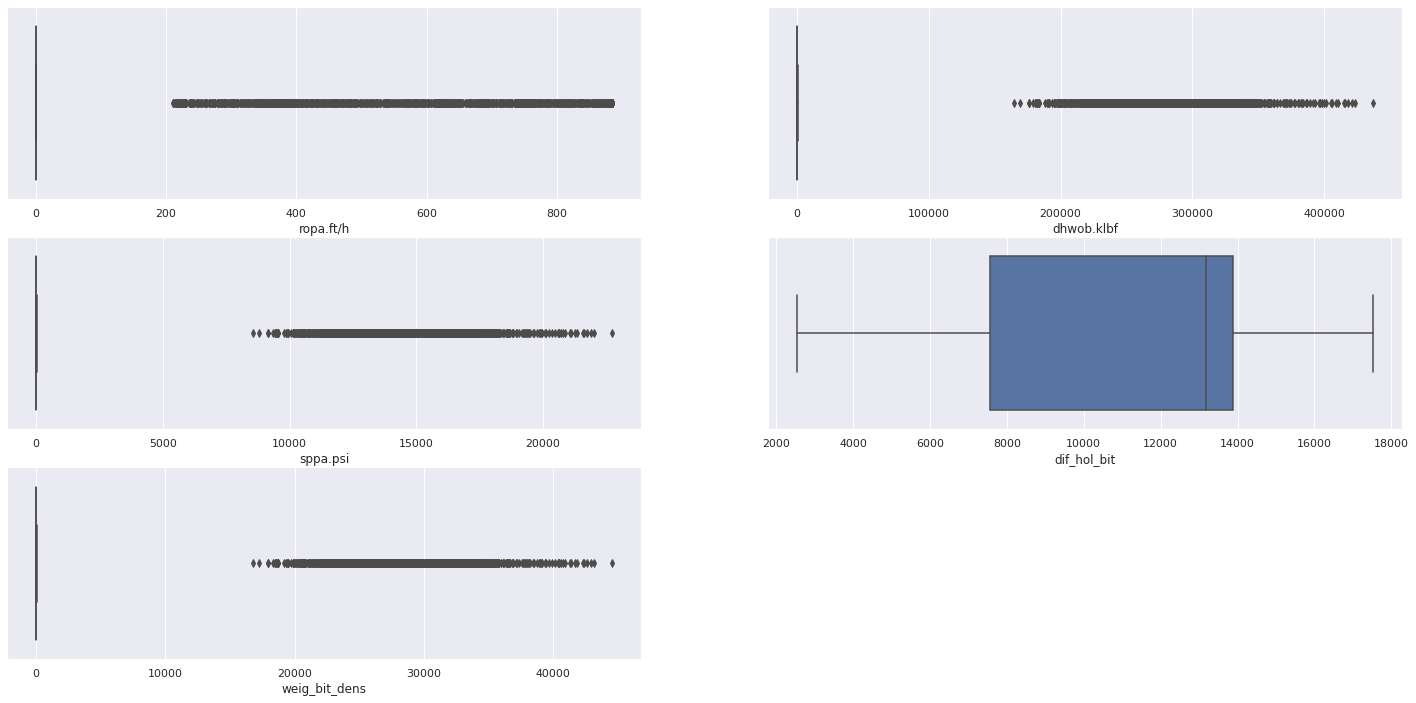

In [54]:
#second set of features

#mfop.%
plt.subplot(3,2,1)
sns.boxplot(df5['ropa.ft/h']);

#ropa.ft/h
plt.subplot(3,2,2)
sns.boxplot(df5['dhwob.klbf']);

#dhwob.klbf
plt.subplot(3,2,3)
sns.boxplot(df5['sppa.psi']);

#sppa.psi
plt.subplot(3,2,4)
sns.boxplot(df5['dif_hol_bit']);

#time.s
plt.subplot(3,2,5)
sns.boxplot(df5['weig_bit_dens']);

## 5.2. Preparing Train Dataset

### 5.2.1. Rescaling

In [72]:
# scaling with RobustScaler to supress the residual outliers.
rs = RobustScaler()

# rpma.rpm
X_train['rpma.rpm'] = rs.fit_transform(X_train[['rpma.rpm']].values)
pickle.dump(rs, open('scalers/rpma_rpm_scaler.pkl', 'wb'))

#bpos.ft
X_train['bpos.ft'] = rs.fit_transform(X_train[['bpos.ft']].values)
pickle.dump(rs, open('scalers/bpos_ft_scaler.pkl', 'wb'))

# scaling with MinMaxScaler to supress but not totally the residual outliers.
mms = MinMaxScaler()

# woba.klbf
X_train['woba.klbf'] = mms.fit_transform(X_train[['woba.klbf']].values)
pickle.dump(mms, open('scalers/woba_klbf_scaler.pkl', 'wb'))

# hkla.klbf
X_train['hkla.klbf'] = mms.fit_transform(X_train[['hkla.klbf']].values)
pickle.dump(mms, open('scalers/hkla_klbf_scaler.pkl', 'wb'))

# dbtm.ft
X_train['dbtm.ft'] = mms.fit_transform(X_train[['dbtm.ft']].values)
pickle.dump(mms, open('scalers/dbtm_ft_scaler.pkl', 'wb'))

# mfop.%
X_train['mfop.%'] = mms.fit_transform(X_train[['mfop.%']].values)
pickle.dump(mms, open('scalers/mfop_%_scaler.pkl', 'wb'))

# ropa.ft/h
X_train['ropa.ft/h'] = mms.fit_transform(X_train[['ropa.ft/h']].values)
pickle.dump(mms, open('scalers/ropa_ft_h_scaler.pkl', 'wb'))

# dhwob.klbf
X_train['dhwob.klbf'] = mms.fit_transform(X_train[['dhwob.klbf']].values)
pickle.dump(mms, open('scalers/dhwob_klbf_scaler.pkl', 'wb'))

# sppa.psi
X_train['sppa.psi'] = mms.fit_transform(X_train[['sppa.psi']].values)
pickle.dump(mms, open('scalers/sppa_psi_scaler.pkl', 'wb'))

# dif_hol_bit
X_train['dif_hol_bit'] = mms.fit_transform(X_train[['dif_hol_bit']].values)
pickle.dump(mms, open('scalers/dif_hol_bit_scaler.pkl', 'wb'))

# weig_bit_dens
X_train['weig_bit_dens'] = mms.fit_transform(X_train[['weig_bit_dens']].values)
pickle.dump(mms, open('scalers/weig_bit_dens_scaler.pkl', 'wb'))

### 5.2.2. Response Variable Transformation

I transformed the response variable in logaritm because the models understand better in this format.

In [56]:
# Response Variable Transformation
y_train = np.log1p(y_train)

## 5.3. Preparing Test Dataset

All did in this part is similar to did in the "Preparing Train Dataset".

### 5.2.1. Rescaling

In [57]:
### scaling with RobustScaler to supress the residual outliers.

# rpma.rpm
rs = pickle.load(open('scalers/rpma_rpm_scaler.pkl', 'rb'))
X_test['rpma.rpm'] = rs.transform(X_test[['rpma.rpm']].values)

#bpos.ft
rs = pickle.load(open('scalers/bpos_ft_scaler.pkl', 'rb'))
X_test['bpos.ft'] = rs.transform(X_test[['bpos.ft']].values)

### scaling with MinMaxScaler to supress but not totally the residual outliers.

# woba.klbf
mms = pickle.load(open('scalers/woba_klbf_scaler.pkl', 'rb'))
X_test['woba.klbf'] = mms.transform(X_test[['woba.klbf']].values)

# hkla.klbf
mms = pickle.load(open('scalers/hkla_klbf_scaler.pkl', 'rb'))
X_test['hkla.klbf'] = mms.transform(X_test[['hkla.klbf']].values)

# dbtm.ft
mms = pickle.load(open('scalers/dbtm_ft_scaler.pkl', 'rb'))
X_test['dbtm.ft'] = mms.transform(X_test[['dbtm.ft']].values)

# mfop.%
mms = pickle.load(open('scalers/mfop_%_scaler.pkl', 'rb'))
X_test['mfop.%'] = mms.transform(X_test[['mfop.%']].values)

# ropa.ft/h
mms = pickle.load(open('scalers/ropa_ft_h_scaler.pkl', 'rb'))
X_test['ropa.ft/h'] = mms.transform(X_test[['ropa.ft/h']].values)

# dhwob.klbf
mms = pickle.load(open('scalers/dhwob_klbf_scaler.pkl', 'rb'))
X_test['dhwob.klbf'] = mms.transform(X_test[['dhwob.klbf']].values)

# sppa.psi
mms = pickle.load(open('scalers/sppa_psi_scaler.pkl', 'rb'))
X_test['sppa.psi'] = mms.transform(X_test[['sppa.psi']].values)

# dif_hol_bit
mms = pickle.load(open('scalers/dif_hol_bit_scaler.pkl', 'rb'))
X_test['dif_hol_bit'] = mms.transform(X_test[['dif_hol_bit']].values)

# weig_bit_dens
mms = pickle.load(open('scalers/weig_bit_dens_scaler.pkl', 'rb'))
X_test['weig_bit_dens'] = mms.transform(X_test[['weig_bit_dens']].values)

### 5.2.1. Response Variable Transformation

In [58]:
# Response Variable Transformation
y_test = np.log1p(y_test)

# 6.0. Step 06 - Feature Selection

In [76]:
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

## 6.1. Recursive Feature Elimination (RFE)

I choiced the RFE because he works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

Then, in this situation he can be able to remove the inefficient features and give me the seven more efficient features to machine learning models.

In [77]:
#define model
rf = RandomForestRegressor(n_jobs = -1)

#feature selector
selector = RFE(rf, n_features_to_select = 7, step = 1)
selector = selector.fit(X,y)

#get ranking
selector.support_

pickle.dump(selector, open('models/selector_sel_model.pkl', 'wb'))

In [78]:
rfe_selected = X.loc[:, selector.support_]
rfe_selected.columns

Index(['woba.klbf', 'dbtm.ft', 'bpos.ft', 'mfop.%', 'ropa.ft/h', 'dif_hol_bit',
       'weig_bit_dens'],
      dtype='object')

## 6.2. Boruta as Feature Selector

Here, I am using Boruta to select features too because the Boruta don't makes his work with a delimited number of features that I decided, but he is capable to determinate the number of features by itself.

Then, using the RFE to have a parameter about the seven bests features to models and the Boruta to select features I was able to finish my feature selection.

In [79]:
#define model
extra_model = RandomForestRegressor(n_jobs=-1)

#split data 
X_train_nn = X.values
y_train_nn = y.values.ravel()

#define boruta
#boruta = BorutaPy(extra_model, n_estimators = 'auto', verbose = 2, random_state = 42).fit(X_train_nn, y_train_nn)
#pickle.dump(boruta, open('models/boruta_sel_model', 'wb'))
boruta = pickle.load(open('models/boruta_sel_model', 'rb'))

#best features from boruta
cols_selected = boruta.support_.tolist()
cols_selected_boruta = X.iloc[:, cols_selected].columns.to_list()
cols_selected_boruta

['woba.klbf',
 'hkla.klbf',
 'bpos.ft',
 'mfop.%',
 'ropa.ft/h',
 'dhwob.klbf',
 'sppa.psi',
 'dif_hol_bit',
 'weig_bit_dens']

## 6.3. Manual Selection

In [80]:
manual

['woba.klbf',
 'dif_hol_bit',
 'hkla.klbf',
 'dbtm.ft',
 'mfop.%',
 'ropa.ft/h',
 'sppa.psi']

## 6.4. Cols Final

Final columns selected with the selected by Boruta and complemented by manual selection.

In [60]:
#final selected columns
cols_final = ['woba.klbf',
 'hkla.klbf',
 'bpos.ft',
 'dbtm.ft',
 'mfop.%',
 'ropa.ft/h',
 'dhwob.klbf',
 'sppa.psi',
 'dif_hol_bit',
 'weig_bit_dens']

# 7.0. Step 07 - Machine Learning Modeling

In [61]:
X_train = X_train[cols_final]
X_test = X_test[cols_final]

## 7.1. Linear Regression

The Linear Regression Model was choiced to be tested because it is very good in simple regression problems, then I decided to test it, but the MAPE (medium absolute percentage error) is very high, then I tried another models.

In [62]:
# model
lr = LinearRegression().fit(X_train, y_train)

# prediction
yhat_lr = lr.predict(X_test)

# performance
lr_result = ml_error('Linear Regression', np.expm1(y_test), np.expm1(yhat_lr))
lr_result

,Model Name,MAE,MAPE,RMSE
0,Linear Regression,33176.08,0.86,46332.56


### 7.1.1. Linear Regression Cross Validation

Here I'm using the cross validation to see the true performance of the linear regression model.

In [63]:
# making the cross validation of linear regression
lr = LinearRegression()
lr_cv = cross_val_score(lr, X_train.values, y_train.ravel(), cv = 10)

In [64]:
print("Average Linear Regression: {} +/- Std {}".format(np.round(np.mean(lr_cv),4),np.round(np.std(lr_cv),6)))

Average Linear Regression: 0.5797 +/- Std 0.025092


## 7.2. Random Forest Regressor

Here I tried the Random Forest Regressor, I choiced it because with the method how the random forest functions, between creating decision trees, is possible to avoid some effects from outliers.

Here the performance of the model was good and can be used.

In [65]:
#model
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42).fit( X_train, y_train )

#prediction
yhat_rf = rf.predict(X_test)

# performance
rf_result = ml_error('Random Forest Regressor', np.expm1(y_test), np.expm1(yhat_rf))
rf_result

,Model Name,MAE,MAPE,RMSE
0,Random Forest Regressor,1173.15,0.02,3050.32


### 7.2.1. Random Forest Regressor Cross Validation

Here I did the cross validation to identify the true performance of the Random Forest Model.

Between a comparasion of the decision trees formuled is possible to find the true performance from the model.

In [66]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
rf_cv = cross_val_score(rf, X_train.values, y_train.ravel(), cv = 10, n_jobs = -1)
pickle.dump(rf_cv, open('models/rf_cv.pkl', 'wb'))
#rf_cv = pickle.load(open('models/rf_cv.pkl', 'rb'))

In [67]:
print("Average Random Forest: {} +/- Std {}".format(np.round(np.mean(rf_cv),4),np.round(np.std(rf_cv),6)))

Average Random Forest: 0.9899 +/- Std 0.007713


In [68]:
rf_true = "Average Random Forest: {} +/- Std {}".format(np.round(np.mean(rf_cv),4),np.round(np.std(rf_cv),6))

## 7.3. XGBoost Regressor

The XGBoost work in a way similar to the Random Forest, but there's a difference. Instead of create various choices trees to find why is more similar to the predict situation, the XGBoost (Extreme Gradient Boosting) has the focus in learn with the error from the choice tree before and create the next tree in a more robust way.

With this, the XGBoost in some situations need less memory to be stored and can be used by companies between deploy in a cheap way.

Explained this, the bad performance of this test was because the XGBoost created a few number of choices trees and didn't be able to make a better performance for now.

In [71]:
# model
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators= 100, eta=0.01, 
                             max_depth=10, subsample=0.7).fit( X_train, y_train )

# prediction
yhat_xgb = model_xgb.predict(X_test)

# performance
xgb_result = ml_error('XGBoost Regressor', np.expm1(y_test), np.expm1(yhat_xgb))
xgb_result

,Model Name,MAE,MAPE,RMSE
0,XGBoost Regressor,196709.29,0.98,215242.47


### 7.2.1. XGBoost Regressor Cross Validation

Here we can see a better performance from XGBoost model because it was able to implement better its method of prediction. 

In [72]:
xg = xgb.XGBRegressor(n_estimators=100, n_jobs=-1, random_state=42)
xg_cv = cross_val_score(xg, X_train.values, y_train.ravel(), cv = 10, n_jobs = -1)
pickle.dump(xg_cv, open('models/xg_cv.pkl', 'wb'))
#xg_cv = pickle.load(open('models/xg_cv.pkl', 'rb'))

In [73]:
print("Average Random Forest: {} +/- Std {}".format(np.round(np.mean(xg_cv),4),np.round(np.std(xg_cv),6)))

Average Random Forest: 0.988 +/- Std 0.007016


In [74]:
true_xg = "Average Random Forest: {} +/- Std {}".format(np.round(np.mean(xg_cv),4),np.round(np.std(xg_cv),6))

## 7.4. Machine Learning Performance

Here is possible to see the performance of the two machine learning models used here, I don't include the Linear Regression because I am not considering he as candidate to be the selected model why the Random Forest and XGBoost has a better performance in the cross validation.

In [75]:
#concat each performance as a dataframe
performance = pd.concat([rf_result,xgb_result])
performance.sort_values('MAPE', ascending = False)

,Model Name,MAE,MAPE,RMSE
0,XGBoost Regressor,196709.29,0.98,215242.47
0,Random Forest Regressor,1162.32,0.02,3020.30


### 7.4.1. Cross Validation Performance

Here we can see that the XGBoost did just a bit better than the Random Forest Model, but on this situation especify, the XGBoost made a model occupying more memory than Random Forest, then I decided to follow with Random Forest Model.

In [76]:
print(rf_true)
print(true_xg)

Average Random Forest: 0.9899 +/- Std 0.00773
Average Random Forest: 0.988 +/- Std 0.007016


# 8.0. Step 08 - Hyperparameter Fine Tuning

## 8.1. Random Search

Here was used a Random Seach to find the best parameters for this model, the parameters seeked was:

max_depth > maximum depth of the tree.

min_samples_split > the minimum number of samples required to split an internal node.

min_samples_leaf > The minimum number of samples required to be at a leaf node.

n_estimators > number of trees in the forest.

In [77]:
#define model
rf_tuned = RandomForestRegressor(n_jobs = -1, random_state = 42)

#parameters
param =  {'max_depth': np.arange(7, 20, 7), 
         'n_estimators': np.arange(1000, 2000, 1500),
         'min_samples_split':np.arange(8, 12, 6),
         'min_samples_leaf':np.arange(4, 8, 6)}

#define random search cv
rf_tuned_cv = RandomizedSearchCV(estimator=rf_tuned, param_distributions=param,
                                scoring='accuracy', n_iter=100, cv=10, verbose=2,
                                random_state=42, n_jobs=-1)

#fit RandomSearchCV
rf_tuned_cv.fit(X_train, np.ravel(y_train))

pickle.dump(rf_tuned_cv, open('models/rf_tuned_cv.pkl', 'wb'))
#rf_tuned_cv = pickle.load(open('syn_finan/fraud_detect/models/rf_tuned_cv.pkl', 'rb'))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [78]:
rf_tuned_cv.best_estimator_

RandomForestRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=1000, n_jobs=-1, random_state=42)

## 8.2. Tuned Model

With this random search parameters the MAPE increased.

But the RMSE, that consider the outliers too, decreased.

In terms of machine learning trully performance, the RMSE is more precise because don't hide informations, then I decided to follow with this new parameters.

In [69]:
#define model
rf_tuned = RandomForestRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=1000, n_jobs=-1, random_state=42)

#training model
rf_tuned.fit(X_train, y_train)
pickle.dump(rf_tuned, open('models/rf_tuned.pkl', 'wb'))
#rf = pickle.load(open('syn_finan/fraud_detect/models/rf_tuned.pkl', 'rb'))

#predict model
yhat_rf_tuned = rf_tuned.predict(X_test)
pickle.dump(yhat_rf_tuned, open('models/yhat_rf_tuned.pkl', 'wb'))
#yhat_rf_tuned = pickle.load(open('syn_finan/fraud_detect/models/yhat_rf_tuned.pkl', 'rb'))

#performance
rf_result_tuned = ml_error('Random Forest Regressor Tuned', np.expm1(y_test), np.expm1(yhat_rf_tuned))

In [70]:
#classification_report
rf_result_tuned

,Model Name,MAE,MAPE,RMSE
0,Random Forest Regressor Tuned,1990.94,0.03,3587.21


# 9.0. Step 09 - Translating To Business Performance

In [81]:
df9 = X_test[cols_final]

# rescale
df9['time_out'] = np.expm1(y_test)
df9['predictions'] = np.expm1(yhat_rf_tuned)

# creating id columns
df9['id'] = df9.index +1

## 9.1. Business Performance

Here I'm translating the results in business performance to demonstrate the best and worst situations that the model can perform.

In [82]:
# sum of predictions
df91 = df9[['id', 'predictions']].groupby('id').sum().reset_index()

# MAE and MAPE
df9_aux1 = df9[['id', 'time_out', 'predictions']].groupby('id').apply(lambda x: mean_absolute_error(x['time_out'], x['predictions'])).reset_index().rename(columns={0:'MAE'})
df9_aux2 = df9[['id', 'time_out', 'predictions']].groupby('id').apply(lambda x: mean_absolute_percentage_error(x['time_out'], x['predictions'])).reset_index().rename(columns={0:'MAPE'})

# Merge
df9_aux3 = pd.merge(df9_aux1, df9_aux2, how='inner', on='id')
df92 = pd.merge(df91, df9_aux3, how='inner', on='id')

# Scenarios
df92['worst_scenario'] = df92['predictions'] + (df92['MAPE']*df92['predictions'])
df92['best_scenario'] = df92['predictions'] - (df92['MAPE']*df92['predictions'])

# order columns
df92 = df92[['id', 'predictions', 'worst_scenario', 'best_scenario', 'MAE', 'MAPE']]

In [88]:
    df92.sort_values('MAPE', ascending=False).head()

,id,predictions,worst_scenario,best_scenario,MAE,MAPE
47,135,46531.77,741508.92,-648445.37,43611.77,14.94
48,136,41662.95,590408.74,-507082.83,38722.95,13.17
0,1,793.77,2625.28,-1037.74,553.77,2.31
1,4,723.33,1744.03,-297.37,423.33,1.41
2,9,845.05,1785.29,-95.18,445.05,1.11


With the dataset of test, I can see that has some predictions with a error of MAPE about more than 1494% and this errors needed to be studied and corrected after this project.

Bellow we can see a scatterplot showing the worst errors of this prediction in the dataset and fortunelly is possible to see that the most of variables has a low error.

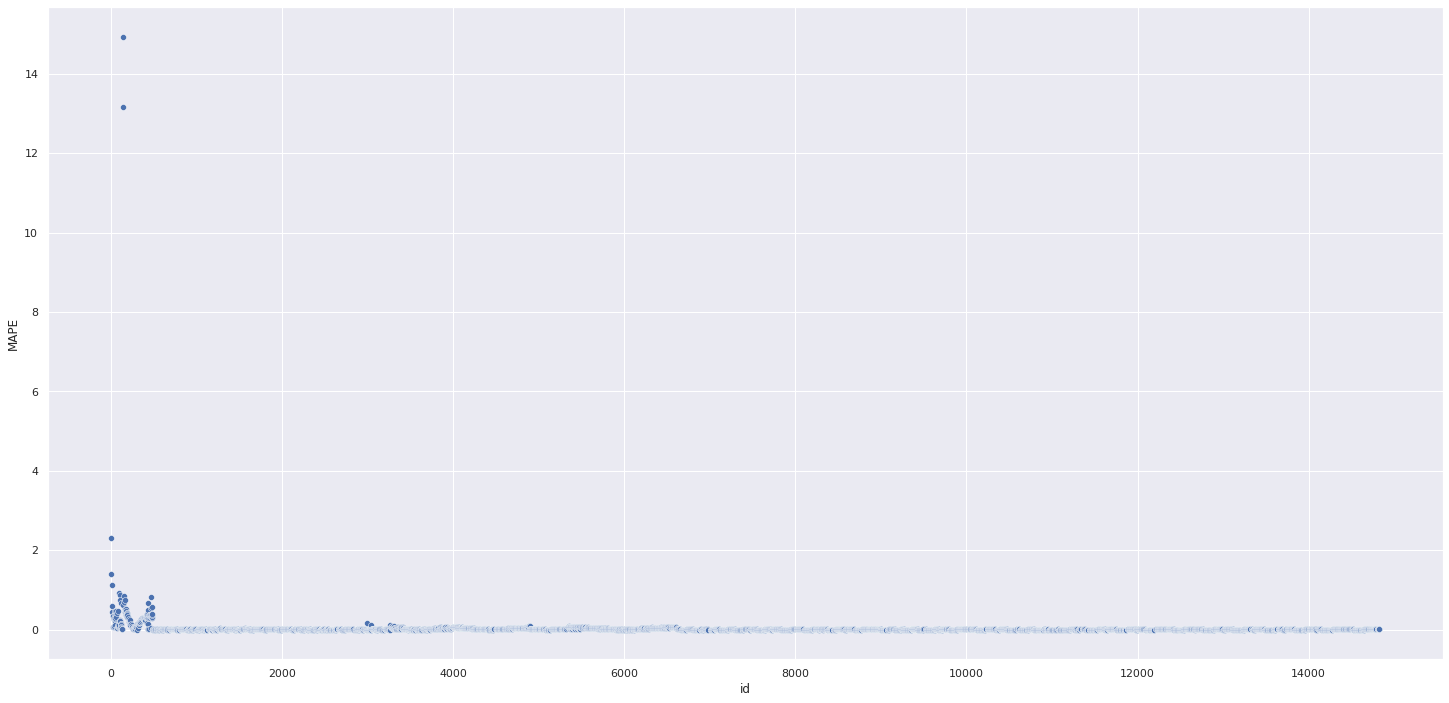

In [84]:
sns.scatterplot(x='id', y='MAPE', data=df92);

With this results is possibly to conclusion that the company will be able to predict how much time will be take to conclude the extractions of the Oil & Gas helping it to get a better preparation in and alocating better its resources to extract with more efficient.

Besides that, the company will be able to understand how is the better tools to make the extraction transforming its way of work in a better efficient method.

## 9.2. Machine Learning Performance Interpretation

To turn the performance more visible on the end was decided to show some plots demonstrating this.

In [85]:
df9['error'] = df9['time_out'] - df9['predictions']
df9['error_rate'] = df9['predictions']/df9['predictions']

<AxesSubplot:xlabel='predictions', ylabel='error'>

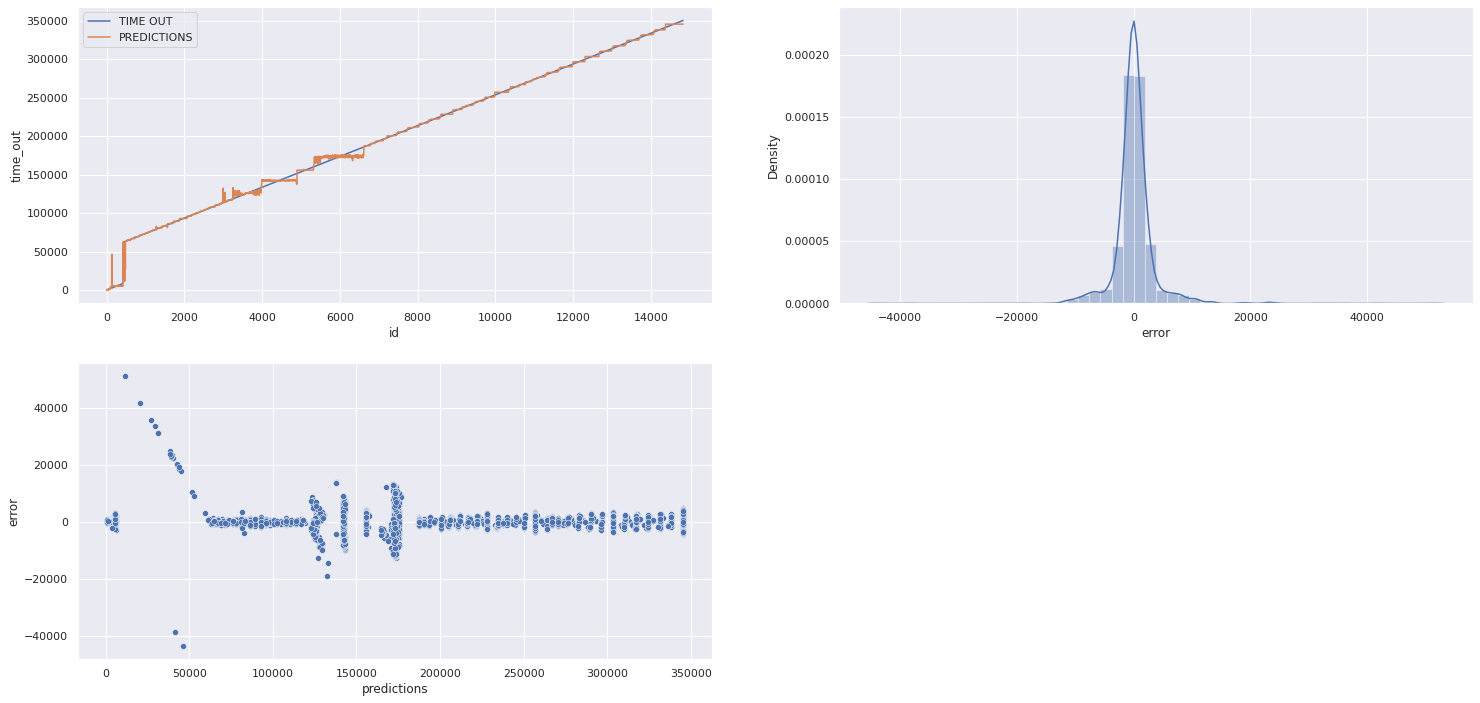

In [86]:
plt.subplot(2, 2, 1)
sns.lineplot(x='id', y='time_out', data=df9, label='TIME OUT')
sns.lineplot(x='id', y='predictions', data=df9, label='PREDICTIONS')

plt.subplot(2, 2, 2)
sns.distplot(df9['error'])

plt.subplot(2, 2, 3)
sns.scatterplot(df9['predictions'], df9['error'])

# 10.0. Step 10 - Deployment

The deployment method was between the streamlit because with him is possible to the company's employees to makes they own predictions with base on the informations that they have.

In [87]:
import pickle
import streamlit as st
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing     import RobustScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

#load the trained model
model = pickle.load(open('model.pkl', 'rb'))

# defining the prediction function
def predict(Wbit, Hookload, BlockPosition, DepthBit, MudFlow, RateOfPenetration, DownholeWbit,
                StandpipePressure, DifHolBit, WbitDens):
                
    # preparing the dataset

    #bpos.ft
    rs = pickle.load(open('scalers/bpos_ft_scaler.pkl', 'rb'))
    BP = (rs.transform([[BlockPosition]]))[0]
    BlockPosition = BP[0]

    # woba.klbf
    mms = pickle.load(open('scalers/woba_klbf_scaler.pkl', 'rb'))
    Wb = (mms.transform([[Wbit]]))[0]
    Wbit = Wb[0]

    # hkla.klbf
    mms = pickle.load(open('scalers/hkla_klbf_scaler.pkl', 'rb'))
    Hk = (mms.transform([[Hookload]]))[0]
    Hookload = Hk[0]

    # dbtm.ft
    mms = pickle.load(open('scalers/dbtm_ft_scaler.pkl', 'rb'))
    DB = (mms.transform([[DepthBit]]))[0]
    DepthBit = DB[0]

    # mfop.%
    mms = pickle.load(open('scalers/mfop_%_scaler.pkl', 'rb'))
    MF = (mms.transform([[MudFlow]]))[0]
    MudFlow = MF[0]

    # ropa.ft/h
    mms = pickle.load(open('scalers/ropa_ft_h_scaler.pkl', 'rb'))
    RP = (mms.transform([[RateOfPenetration]]))[0]
    RateOfPenetration = RP[0]

    # dhwob.klbf
    mms = pickle.load(open('scalers/dhwob_klbf_scaler.pkl', 'rb'))
    DW = (mms.transform([[DownholeWbit]]))[0]
    DownholeWbit = DW[0]

    # sppa.psi
    mms = pickle.load(open('scalers/sppa_psi_scaler.pkl', 'rb'))
    SP = (mms.transform([[StandpipePressure]]))[0]
    StandpipePressure = SP[0]

    # dif_hol_bit
    mms = pickle.load(open('scalers/dif_hol_bit_scaler.pkl', 'rb'))
    DB = (mms.transform([[DifHolBit]]))[0]
    DifHolBit = DB[0]

    # weig_bit_dens
    mms = pickle.load(open('scalers/weig_bit_dens_scaler.pkl', 'rb'))
    WD = (mms.transform([[WbitDens]]))[0]
    WbitDens = WD[0]

    # making the prediction
    yhat = model.predict([[Wbit, Hookload, BlockPosition, DepthBit, MudFlow, RateOfPenetration, DownholeWbit,
                StandpipePressure, DifHolBit, WbitDens]])
    
    # giving the answer
    prediction = (yhat)
    
    return prediction
    
def main():
    st.header('Time Out and In Slips Predictor')
    st.text("Author: Valcilio Eugenio - Data Scientist")
    
    #asking for DepthHole
    DepthHole = st.number_input('Depth Hole (measured) in feet (ft)', value=0)
    
    #asking for DepthBit
    DepthBit = st.number_input('Total feet (ft) of the Depth Bit (measured)', value=0)
    
    #asking for StandpipePressure
    StandpipePressure = st.number_input('Standpipe Pressure (average)', value=0)
    
    #asking for Hookload
    Hookload = st.number_input('Force (klbf) of Hookload (average)', value=0)
    
    #asking for BlockPosition
    BlockPosition = st.number_input('Block position in feet (ft)', value=0)
    
    #asking for MudFlow
    MudFlow = st.number_input('Mud Flow Out (percentual)', value=0)
    
    if MudFlow > 0:
        
        #defining wbit
        df1_var1 = DepthBit*0.052
        Wbit = StandpipePressure/df1_var1
    
        #defining rate of penetration
        RateOfPenetration = DepthBit/DepthHole
    
        #defining downhole weight on bit
        DownholeWbit = Wbit*DepthBit
    
        #defining the difference between depth bit and depth hole
        DifHolBit = DepthHole - DepthBit
    
        #defining the Wbit Density
        WbitDens = (Wbit/9.807)*DepthBit
    
        # defining result
        result = ''
        final_result = ''
    
    if st.button('Predict'):
        
        #making the prediction
        result = predict(Wbit, Hookload, BlockPosition, DepthBit, MudFlow, RateOfPenetration, DownholeWbit,
                StandpipePressure, DifHolBit, WbitDens)
        
        # converting and showing result
        result = (np.expm1(result))
        
        if result > 0:
            
            result_final = (result/60)
                                   
            if result_final >= 3.9:
                result_min_in = math.floor(result_final*0.26)
                result_sec_in = math.floor(((((result/60)*0.26) - result_min_in)*60))
                st.success(f'\nThe slips will be placed in at: {result_min_in} minutes and {result_sec_in} seconds')
     
            elif result_final < 3.9:
                result_sec_in = math.floor(result*0.26)
                st.success(f'\nThe slips will be placed in at: {result_sec_in} seconds')
        
            result_min = math.floor(result_final)
            result_sec = math.floor(((result/60) - result_min)*60)
            st.success(f'\nThe slips will be placed out at: {result_min} minutes and {result_sec} seconds')
        
if __name__ == '__main__':
    main()

FileNotFoundError: [Errno 2] No such file or directory: 'rf_tuned.pkl'

# 11.0. Step 11 - Next Steps And Conclusion

## 11.1. Next Steps

How next steps is recommended the following actions:

    - Reunion to explain the performance and utilities of the model;
    - In the same reunion, explain how use the Web App to produce results;
    - Finalize the reunion speaking about some new features to get and improve the performance of the model;
        - Features Example:
            - Mud densities;
            - Torque informations;
            - Quality of employees who work with the activity of this model. 
    - Work in others models to turn more efficient other areas of this activity.

## 11.2. Conclusion

This project was created with the intuit to be possible help the company to predict how much time will be spent with the activity to 'slips in' and 'slips out' and the objective was concluded with a machine learning model with a MAPE of 0,03% and a deployment between the streamlit to be accessible to all person.

Following the next steps part is possible to instruct the business people to obtain insights with this model between utilize the web application and help them do their jobs more efficiently.

Besides that, this model can give a return of up to 20%, if we considering the MAPE we can see a return about 19% because this model can help the organization to make their preparations in advance.

Lastly, with this project's web application is possible to help the business people to develop their own insights using the model in real time.